<a href="https://colab.research.google.com/github/SBShimm/Datathon/blob/main/Result/Visual_Flix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#cd /content/Datathon
#! git clone https://github.com/SBShimm/Datathon.git

# 1. 데이터 가져오기
## 1) 데이터 합치기
- 넷플릭스 기존 데이터셋에 별점 데이터가 없어서 외부데이터인 IMDB데이터를 함께 사용하였습니다.
- IMDB(외부 데이터) : https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney

In [3]:
netflix = pd.read_csv('/content/Datathon/Datathon/Dataset/netflix_titles.csv')
imdb = pd.read_csv('/content/Datathon/Datathon/Dataset/netflix_imdb.csv')

In [4]:
netflix.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [5]:
imdb.head()

Show Id                          Title  \
0  cc1b6ed9-cf9e-4057-8303-34577fb54477                       (Un)Well   
1  e2ef4e91-fb25-42ab-b485-be8e3b23dedb                         #Alive   
2  b01b73b7-81f6-47a7-86d8-acb63080d525  #AnneFrank - Parallel Stories   
3  b6611af0-f53c-4a08-9ffa-9716dc57eb9c                       #blackAF   
4  7f2d4170-bab8-4d75-adc2-197f7124c070               #cats_the_mewvie   

                                         Description  \
0  This docuseries takes a deep dive into the luc...   
1  As a grisly virus rampages a city, a lone man ...   
2  Through her diary, Anne Frank's story is retol...   
3  Kenya Barris and his family navigate relations...   
4  This pawesome documentary explores how our fel...   

                      Director  \
0                          NaN   
1                       Cho Il   
2  Sabina Fedeli, Anna Migotto   
3                          NaN   
4             Michael Margolis   

                                           Genres  \
0                                      Reality TV   
1  Horror Movies, International Movies, Thrillers   
2             Documentaries, International Movies   
3                                     TV Comedies   
4             Documentaries, International Movies   

                                                Cast Production Country  \
0                                                NaN      United States   
1                           Yoo Ah-in, Park Shin-hye        South Korea   
2                        Helen Mirren, Gengher Gatti              Italy   
3  Kenya Barris, Rashida Jones, Iman Benson, Genn...      United States   
4                                                NaN             Canada   

   Release Date Rating  Duration Imdb Score Content Type         Date Added  
0        2020.0  TV-MA  1 Season     6.6/10      TV Show                NaN  
1        2020.0  TV-MA    99 min     6.2/10        Movie  September 8, 2020  
2        2019.0  TV-14    95 min     6.4/10        Movie       July 1, 2020  
3        2020.0  TV-MA  1 Season     6.6/10      TV Show                NaN  
4        2020.0  TV-14    90 min     5.1/10        Movie   February 5, 2020

- IMDB데이터의 별점 형태가 9.0/10 같은 형태로 되어 있어서 정규표현식을 이용해 실제 별점만 가져오도록하겠습니다.
- imdb 데이터와 netflix 데이터를 title 기준으로 join을 시켜줄건데 imdb 데이터에는 칼럼명이 대문자로 다르게 되어 있어서 같게 맞추어 주겠습니다.

In [6]:
imdb_join = imdb[['Title', 'Imdb Score']]
imdb_join.columns = ['title', 'Imdb'] #문자 통합

imdb_join['IMDB'] = imdb_join.Imdb.str.extract(r'(\d+.\d+)') #정규표현식 이용
del imdb_join['Imdb']

In [7]:
imdb_join.head()

title IMDB
0                       (Un)Well  6.6
1                         #Alive  6.2
2  #AnneFrank - Parallel Stories  6.4
3                       #blackAF  6.6
4               #cats_the_mewvie  5.1

- 이제 넷플릭스 데이터와 imdb 데이터를 pandas의 merge 함수를 이용해 left outer join 해주도록 하겠습니다.

In [8]:
data_join = pd.merge(left=netflix, right=imdb_join, how='left', on='title')
data_join.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description IMDB  
0  As her father nears the end of his life, filmm...  7.4  
1  After crossing paths at a party, a Cape Town t...  6.3  
2  To protect his family from a powerful drug lor...  NaN  
3  Feuds, flirtations and toilet talk go down amo...  NaN  
4  In a city of coaching centers known to train I...  NaN

In [9]:
data_join.to_csv('Netflix_IMDB.csv')

- join에 성공한 데이터를 csv파일로 저장하였습니다. 앞으로 이 데이터를 사용하도록 하겠습니다.

In [10]:
file_dir = '/content/Datathon/Datathon/Dataset/Netflix_IMDB.csv'

data = pd.read_csv(file_dir)

In [11]:
data.head()

Unnamed: 0 show_id     type                  title         director  \
0           0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1           1      s2  TV Show          Blood & Water              NaN   
2           2      s3  TV Show              Ganglands  Julien Leclercq   
3           3      s4  TV Show  Jailbirds New Orleans              NaN   
4           4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  IMDB  
0  As her father nears the end of his life, filmm...   7.4  
1  After crossing paths at a party, a Cape Town t...   6.3  
2  To protect his family from a powerful drug lor...   NaN  
3  Feuds, flirtations and toilet talk go down amo...   NaN  
4  In a city of coaching centers known to train I...   NaN

# 2. Data 전처리

## 1) Year, Month Data 추출
- 일단, 데이터 중에 date_added 칼럼이 있는데, 년-월-일 형식입니다.
- 저희는 분석 목표가 연도별 넷플릭스의 행보였기 때문에 연도만 따로 칼럼을 가지는 것이 좋을 것 같습니다. 하는 김에 month도 추가하도록 하겠습니다.

In [12]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [13]:
# data에서 년, 월, 일 추출
data['year'] = data.date_added.apply(lambda x : x.year)
data['month'] = data.date_added.apply(lambda x : x.month)
data['day'] = data.date_added.apply(lambda x : x.day)

#년월일 int로 변경
data['year'] = pd.to_datetime(data['year']).astype(np.int64)
data['month'] = pd.to_datetime(data['month']).astype(np.int64)
data['day'] = pd.to_datetime(data['day']).astype(np.int64)
data.drop(data.loc[data['year']<0].index, inplace=True)

data.head(3)

Unnamed: 0 show_id     type                 title         director  \
0           0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1           1      s2  TV Show         Blood & Water              NaN   
2           2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  IMDB  year  month  day  
0  As her father nears the end of his life, filmm...   7.4  2021      9   25  
1  After crossing paths at a party, a Cape Town t...   6.3  2021      9   24  
2  To protect his family from a powerful drug lor...   NaN  2021      9   24

 - 이제 칼럼별 결측치를 확인해보겠습니다.

In [14]:
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2))) #결측치 확인

director's null rate :29.87%
cast's null rate :9.34%
country's null rate :9.51%
rating's null rate :0.05%
duration's null rate :0.03%
IMDB's null rate :39.98%


- 결측치가 굉장히 많은데요. 감독, 배우 등의 데이터는 따로 보간할 방법이 없을 거라고 판단하였습니다. (하나하나 검색해서 넣을 수도 없고..)
- imdb 데이터는 다른 데이터셋에 있는 데이터를 join한 것이어서 결측치가 많을 수 밖에 없습니다.(원본 데이터는 8800갠데 imdb데이터는 5000개 정도였음)

## 2) Country data 전처리
- country 데이터는 컨텐츠가 제작된 나라를 보여줍니다. 여러 나라에서 제작에 참여한 경우에는 여러 개의 콤마로 구분되어 데이터가 들어가 있습니다. 
- 데이터를 조사해 본 결과 제일 처음 적힌 나라가 작품을 제작하는데 가장 많은 기여를 한 국가라고 판단되어 정규표현식을 사용하여 첫번째 국가만 추출했습니다. 

In [15]:
data['first_country'] = data.country.str.extract(r'([a-zA-Z\s]+)')

In [16]:
data.head()

Unnamed: 0 show_id     type                  title         director  \
0           0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1           1      s2  TV Show          Blood & Water              NaN   
2           2      s3  TV Show              Ganglands  Julien Leclercq   
3           3      s4  TV Show  Jailbirds New Orleans              NaN   
4           4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  IMDB  year  month  day  \
0  As her father nears the end of his life, filmm...   7.4  2021      9   25   
1  After crossing paths at a party, a Cape Town t...   6.3  2021      9   24   
2  To protect his family from a powerful drug lor...   NaN  2021      9   24   
3  Feuds, flirtations and toilet talk go down amo...   NaN  2021      9   24   
4  In a city of coaching centers known to train I...   NaN  2021      9   24   

   first_country  
0  United States  
1   South Africa  
2            NaN  
3            NaN  
4          India

## 3) 타입별 dataframe 나누기
- type 칼럼은 컨텐츠가 TV Show인지 Movie 인지를 나타냅니다. 이 타입별로 특징적인 세부장르가 있어서 dataframe을 나누었습니다. 

In [17]:
df_tv = data[data["type"] == "TV Show"]
df_movie = data[data["type"] == "Movie"]

#### 4) 장르별 작품 counting 
- listed in 칼럼은 해당 작품의 장르를 가집니다.
- 작품이 다양한 장르를 포함할 경우 콤마로 구분된 여러 장르가 들어있습니다.
- 장르별로 작품의 수를 간편하게 count하기 위해 함수를 만들었습니다.

In [18]:
def genre_count(df):

    genere = df.listed_in.value_counts() # 장르별 count를 담는 series 생성
    gener = {}
    
    for idx, val in genere.items(): # index, count value 별로 반복문 실행
        l = idx.split(',')
        for i in l: # listed in의 여러 장르를 콤마로 split하여 반복문 실행 (장르별 count 갱신)
            i = i.strip()
            if i in gener.keys():
                d = {}
                d[i] = val + gener[i]
                gener.update(d)
            else:
                d = {i:val}
                gener.update(d)
    theme, count = [],[]
    
    for idx, val in gener.items():
        theme.append(idx)
        count.append(val)
    
    list_temp = (pd.DataFrame({'genre':theme, 'count': count})
        .sort_values('count', ascending = True)) # dataframe 생성
    list_temp.reset_index(drop = True, inplace = True)
    
    return list_temp

- 위에서 만들어 낸 함수로 TV Show와 Movie의 장르별 개수를 각각 세어 보겠습니다.

In [19]:
tv_genre = genre_count(df_tv)
tv_genre

genre  count
0                       TV Shows     16
1              Classic & Cult TV     26
2   Stand-Up Comedy & Talk Shows     56
3                   TV Thrillers     59
4                  Teen TV Shows     69
5                      TV Horror     76
6            TV Sci-Fi & Fantasy     84
7            Science & Nature TV     92
8                   TV Mysteries    101
9                Korean TV Shows    155
10         TV Action & Adventure    168
11     Spanish-Language TV Shows    173
12                  Anime Series    178
13              British TV Shows    255
14                    Reality TV    256
15             Romantic TV Shows    377
16                    Docuseries    394
17                      Kids' TV    453
18                Crime TV Shows    473
19                   TV Comedies    582
20                     TV Dramas    772
21        International TV Shows   1369

In [20]:
mv_genre = genre_count(df_movie)
mv_genre

genre  count
0                     Movies     58
1       Faith & Spirituality     66
2                Cult Movies     71
3             Anime Features     71
4               LGBTQ Movies    103
5             Classic Movies    116
6              Sports Movies    220
7           Sci-Fi & Fantasy    245
8            Stand-Up Comedy    343
9              Horror Movies    358
10          Music & Musicals    378
11                 Thrillers    580
12           Romantic Movies    620
13  Children & Family Movies    643
14        Independent Movies    761
15        Action & Adventure    870
16             Documentaries    875
17                  Comedies   1680
18                    Dramas   2447
19      International Movies   2781

#### 5) 별점 구간화 dataframe 생성 
- 먼저 별점이 높은 순서대로 데이터를 뽑아보았습니다.

In [21]:
df_rating = data.sort_values(by = 'IMDB',ascending=False)
df_rating.head(5)

Unnamed: 0 show_id     type                       title director  \
6010        6010   s5941  TV Show                Breaking Bad      NaN   
2558        2558   s2520  TV Show  Avatar: The Last Airbender      NaN   
3119        3119   s3072  TV Show                  Reply 1988      NaN   
688          688    s681  TV Show              The Last Dance      NaN   
3995        3995   s3939  TV Show                  Our Planet      NaN   

                                                   cast  \
6010  Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...   
2558  Zach Tyler, Mae Whitman, Jack De Sena, Dee Bra...   
3119  Lee Hye-ri, Park Bo-gum, Ryu Jun-yeol, Ko Kyou...   
688       Michael Jordan, Scottie Pippen, Dennis Rodman   
3995                                 David Attenborough   

                            country date_added  release_year rating  \
6010                  United States 2013-08-02          2013  TV-MA   
2558                  United States 2020-05-15          2007  TV-Y7   
3119                    South Korea 2020-01-01          2015  TV-14   
688                   United States 2021-06-19          2020  TV-MA   
3995  United States, United Kingdom 2019-04-05          2019  TV-PG   

       duration                                          listed_in  \
6010  5 Seasons            Crime TV Shows, TV Dramas, TV Thrillers   
2558  3 Seasons  Classic & Cult TV, Kids' TV, TV Action & Adven...   
3119   1 Season  International TV Shows, Korean TV Shows, Roman...   
688    1 Season                                         Docuseries   
3995   1 Season                    Docuseries, Science & Nature TV   

                                            description  IMDB  year  month  \
6010  A high school chemistry teacher dying of cance...   9.4  2013      8   
2558  Siblings Katara and Sokka wake young Aang from...   9.3  2020      5   
3119  Take a nostalgic trip back to the late 1980s t...   9.2  2020      1   
688   This docuseries gives a definitive account of ...   9.2  2021      6   
3995  Experience our planet's natural beauty and exa...   9.2  2019      4   

      day  first_country  
6010    2  United States  
2558   15  United States  
3119    1    South Korea  
688    19  United States  
3995    5  United States

- 시각화와 별점 데이터 구간화를 위해 사용할 컬럼들을 df_temp에 담아줬습니다.

In [22]:
#별점 구간화 위한 데이터 추출
df_temp = df_rating[['show_id','type','listed_in','IMDB']]
df_temp

show_id     type                                          listed_in  IMDB
6010   s5941  TV Show            Crime TV Shows, TV Dramas, TV Thrillers   9.4
2558   s2520  TV Show  Classic & Cult TV, Kids' TV, TV Action & Adven...   9.3
3119   s3072  TV Show  International TV Shows, Korean TV Shows, Roman...   9.2
688     s681  TV Show                                         Docuseries   9.2
3995   s3939  TV Show                    Docuseries, Science & Nature TV   9.2
...      ...      ...                                                ...   ...
8871   s8802    Movie            Dramas, International Movies, Thrillers   NaN
8872   s8803    Movie                     Cult Movies, Dramas, Thrillers   NaN
8873   s8804  TV Show             Kids' TV, Korean TV Shows, TV Comedies   NaN
8875   s8806    Movie                 Children & Family Movies, Comedies   NaN
8876   s8807    Movie     Dramas, International Movies, Music & Musicals   NaN

[8867 rows x 4 columns]

- 현재 imdb에 담긴 별점 데이터는 소수점 형식이라 너무 세분화 되어있습니다.
- 데이터 구간화를 통해 1-10으로 데이터를 나눠줬습니다.

In [23]:
#소수점 데이터를 구간화시켜 1~10까지 나눔 
df_temp['IMDB_band']=0
df_temp.loc[df_temp['IMDB']<=1, 'IMDB_band']=1
df_temp.loc[(df_temp['IMDB']>1)&(df_temp['IMDB']<=2),'IMDB_band']=2
df_temp.loc[(df_temp['IMDB']>2)&(df_temp['IMDB']<=3),'IMDB_band']=3
df_temp.loc[(df_temp['IMDB']>3)&(df_temp['IMDB']<=4),'IMDB_band']=4
df_temp.loc[(df_temp['IMDB']>4)&(df_temp['IMDB']<=5),'IMDB_band']=5
df_temp.loc[(df_temp['IMDB']>5)&(df_temp['IMDB']<=6),'IMDB_band']=6
df_temp.loc[(df_temp['IMDB']>6)&(df_temp['IMDB']<=7),'IMDB_band']=7
df_temp.loc[(df_temp['IMDB']>7)&(df_temp['IMDB']<=8),'IMDB_band']=8
df_temp.loc[(df_temp['IMDB']>8)&(df_temp['IMDB']<=9),'IMDB_band']=9
df_temp.loc[df_temp['IMDB']>9,'IMDB_band']=10
df_rating['IMDB_band'] = df_temp['IMDB_band']
df_rating

Unnamed: 0 show_id     type                       title  \
6010        6010   s5941  TV Show                Breaking Bad   
2558        2558   s2520  TV Show  Avatar: The Last Airbender   
3119        3119   s3072  TV Show                  Reply 1988   
688          688    s681  TV Show              The Last Dance   
3995        3995   s3939  TV Show                  Our Planet   
...          ...     ...      ...                         ...   
8871        8871   s8802    Movie                     Zinzana   
8872        8872   s8803    Movie                      Zodiac   
8873        8873   s8804  TV Show                 Zombie Dumb   
8875        8875   s8806    Movie                        Zoom   
8876        8876   s8807    Movie                      Zubaan   

             director                                               cast  \
6010              NaN  Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...   
2558              NaN  Zach Tyler, Mae Whitman, Jack De Sena, Dee Bra...   
3119              NaN  Lee Hye-ri, Park Bo-gum, Ryu Jun-yeol, Ko Kyou...   
688               NaN      Michael Jordan, Scottie Pippen, Dennis Rodman   
3995              NaN                                 David Attenborough   
...               ...                                                ...   
8871  Majid Al Ansari  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8872    David Fincher  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8873              NaN                                                NaN   
8875     Peter Hewitt  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8876      Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                            country date_added  release_year rating  \
6010                  United States 2013-08-02          2013  TV-MA   
2558                  United States 2020-05-15          2007  TV-Y7   
3119                    South Korea 2020-01-01          2015  TV-14   
688                   United States 2021-06-19          2020  TV-MA   
3995  United States, United Kingdom 2019-04-05          2019  TV-PG   
...                             ...        ...           ...    ...   
8871   United Arab Emirates, Jordan 2016-03-09          2015  TV-MA   
8872                  United States 2019-11-20          2007      R   
8873                            NaN 2019-07-01          2018  TV-Y7   
8875                  United States 2020-01-11          2006     PG   
8876                          India 2019-03-02          2015  TV-14   

       duration                                          listed_in  \
6010  5 Seasons            Crime TV Shows, TV Dramas, TV Thrillers   
2558  3 Seasons  Classic & Cult TV, Kids' TV, TV Action & Adven...   
3119   1 Season  International TV Shows, Korean TV Shows, Roman...   
688    1 Season                                         Docuseries   
3995   1 Season                    Docuseries, Science & Nature TV   
...         ...                                                ...   
8871     96 min            Dramas, International Movies, Thrillers   
8872    158 min                     Cult Movies, Dramas, Thrillers   
8873  2 Seasons             Kids' TV, Korean TV Shows, TV Comedies   
8875     88 min                 Children & Family Movies, Comedies   
8876    111 min     Dramas, International Movies, Music & Musicals   

                                            description  IMDB  year  month  \
6010  A high school chemistry teacher dying of cance...   9.4  2013      8   
2558  Siblings Katara and Sokka wake young Aang from...   9.3  2020      5   
3119  Take a nostalgic trip back to the late 1980s t...   9.2  2020      1   
688   This docuseries gives a definitive account of ...   9.2  2021      6   
3995  Experience our planet's natural beauty and exa...   9.2  2019      4   
...                                                 ...   ...   ...    ...   
8871  Recovering alcoholic Talal wakes up inside a s...   NaN  2016     

- 타입별로 별점을 평균내서 시각화에 활용하겠습니다.

In [24]:
df_temp_movie = df_temp[df_temp['type'] == 'Movie']
df_temp_movie
df_temp_tv = df_temp[df_temp['type'] == 'TV Show']
df_temp_tv

show_id     type                                          listed_in  \
6010   s5941  TV Show            Crime TV Shows, TV Dramas, TV Thrillers   
2558   s2520  TV Show  Classic & Cult TV, Kids' TV, TV Action & Adven...   
3119   s3072  TV Show  International TV Shows, Korean TV Shows, Roman...   
688     s681  TV Show                                         Docuseries   
3995   s3939  TV Show                    Docuseries, Science & Nature TV   
...      ...      ...                                                ...   
8855   s8786  TV Show                                           Kids' TV   
8865   s8796  TV Show                             Anime Series, Kids' TV   
8867   s8798  TV Show                                           Kids' TV   
8870   s8801  TV Show  International TV Shows, Romantic TV Shows, TV ...   
8873   s8804  TV Show             Kids' TV, Korean TV Shows, TV Comedies   

      IMDB  IMDB_band  
6010   9.4         10  
2558   9.3         10  
3119   9.2         10  
688    9.2         10  
3995   9.2         10  
...    ...        ...  
8855   NaN          0  
8865   NaN          0  
8867   NaN          0  
8870   NaN          0  
8873   NaN          0  

[2694 rows x 5 columns]

# 3. 시각화
두둥..!!

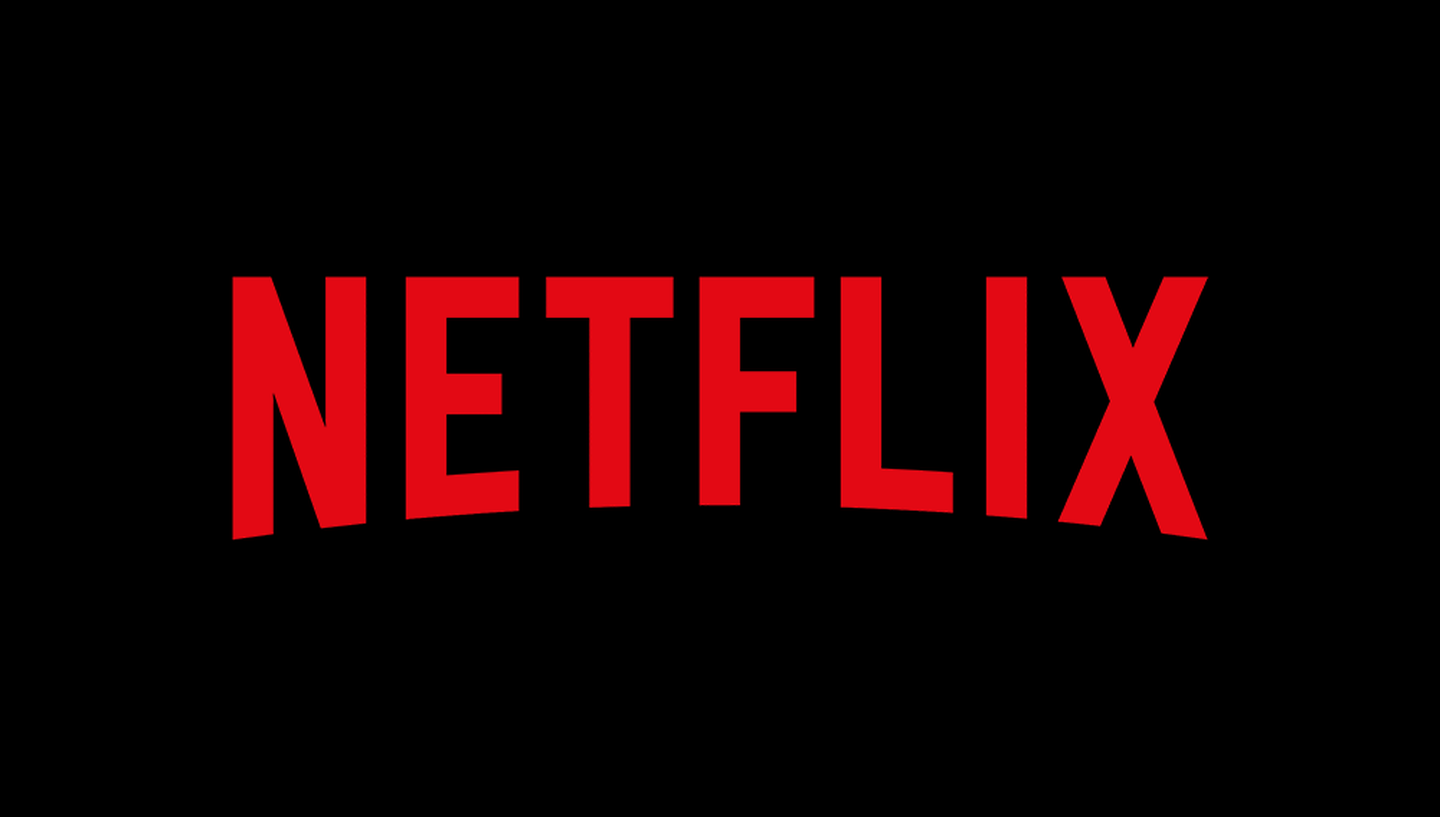

Netflix Color Palette 생성

- 컬러믹서 사이트를 활용하여 넷플릭스 시그니처 컬러를 그라데이션 한 팔레트를 생성했습니다.

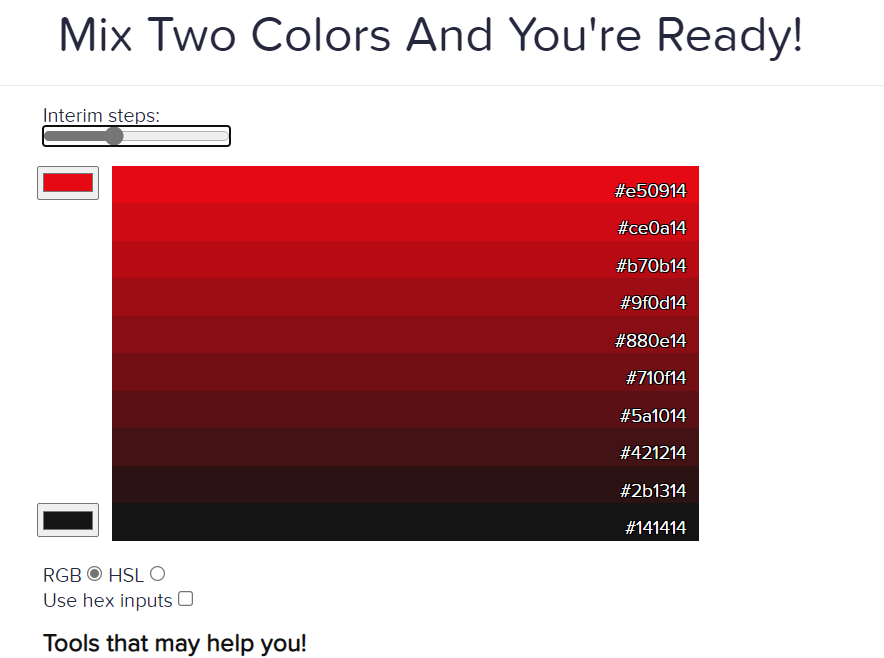

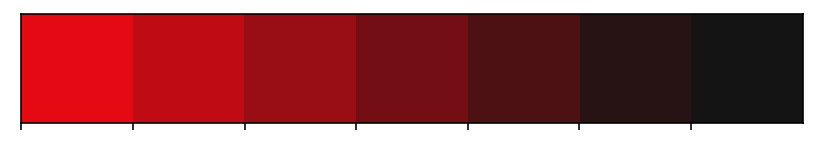

In [25]:
grad = ["#e50914", "#bf0b14", "#990d14","#730f14","#4d1114" , "#271314","#141414"]
sns.palplot(sns.color_palette(grad))
sns.set_palette(sns.color_palette(grad))

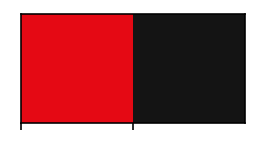

In [26]:
colors = ["#E50914", "#141414"]
sns.palplot(sns.color_palette(colors))
sns.set_palette(sns.color_palette(colors))

## 1) Movie & TV Show
- 먼저 TV Show와 Movie의 비율을 확인해보겠습니다.
- matplotlib의 pieplot을 사용하였습니다. 

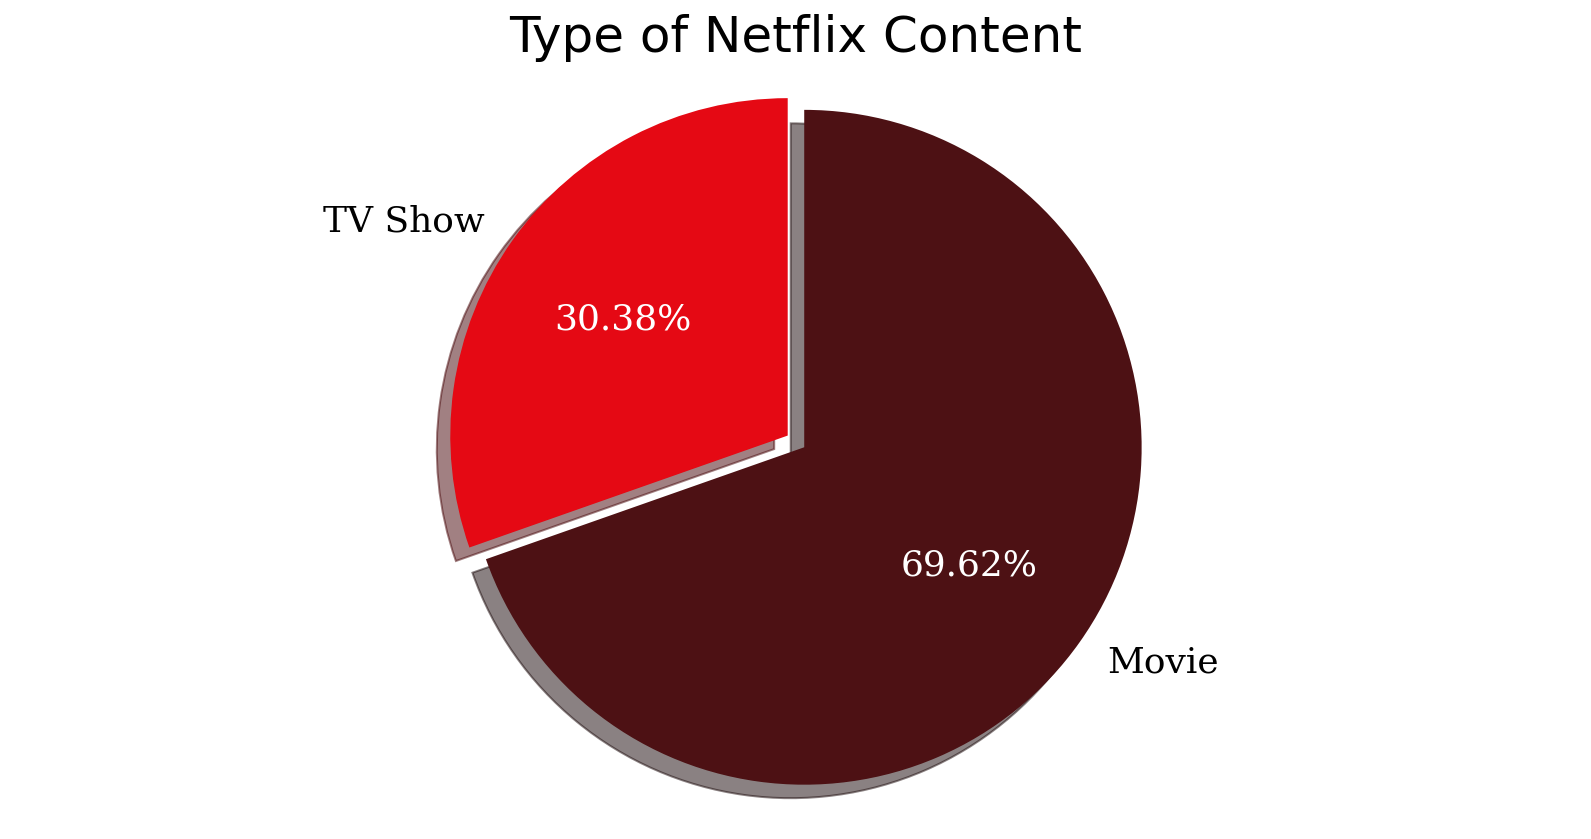

In [27]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
patches, texts, autotexts = plt.pie(
    data['type'].value_counts().sort_values(),labels=labels,explode=[0.03,0.03],
    autopct='%1.2f%%',shadow=True, 
    colors=("#e50914" ,"#4d1114"), startangle=90)

## label만 변경해주기 
for t in texts:
    t.set_color("black")
    t.set_fontproperties('serif')
    t.set_fontsize(18)
## pie 위의 텍스트를 다른 색으로 변경해주기 
for t in autotexts:
    t.set_color("white")
    t.set_fontproperties('serif')
    t.set_fontsize(18)

plt.title('Type of Netflix Content', fontsize=25)
plt.axis('equal')
plt.show()

## 2)나라별 컨텐츠 수 TOP20
- 다음은 어떤 나라의 컨텐츠가 가장 많이 추가되었는지 확인해 보겠습니다.
- matplotlib에서 축없는 버블차트를 보기 쉽게 표현하기 위해 제공하는 클래스 BubbleChart를 활용하여 표현했습니다.

In [28]:
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            font_color = 'black' if 8 <= i <= 12 else 'white'
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center',
                    color=font_color, fontsize=17)

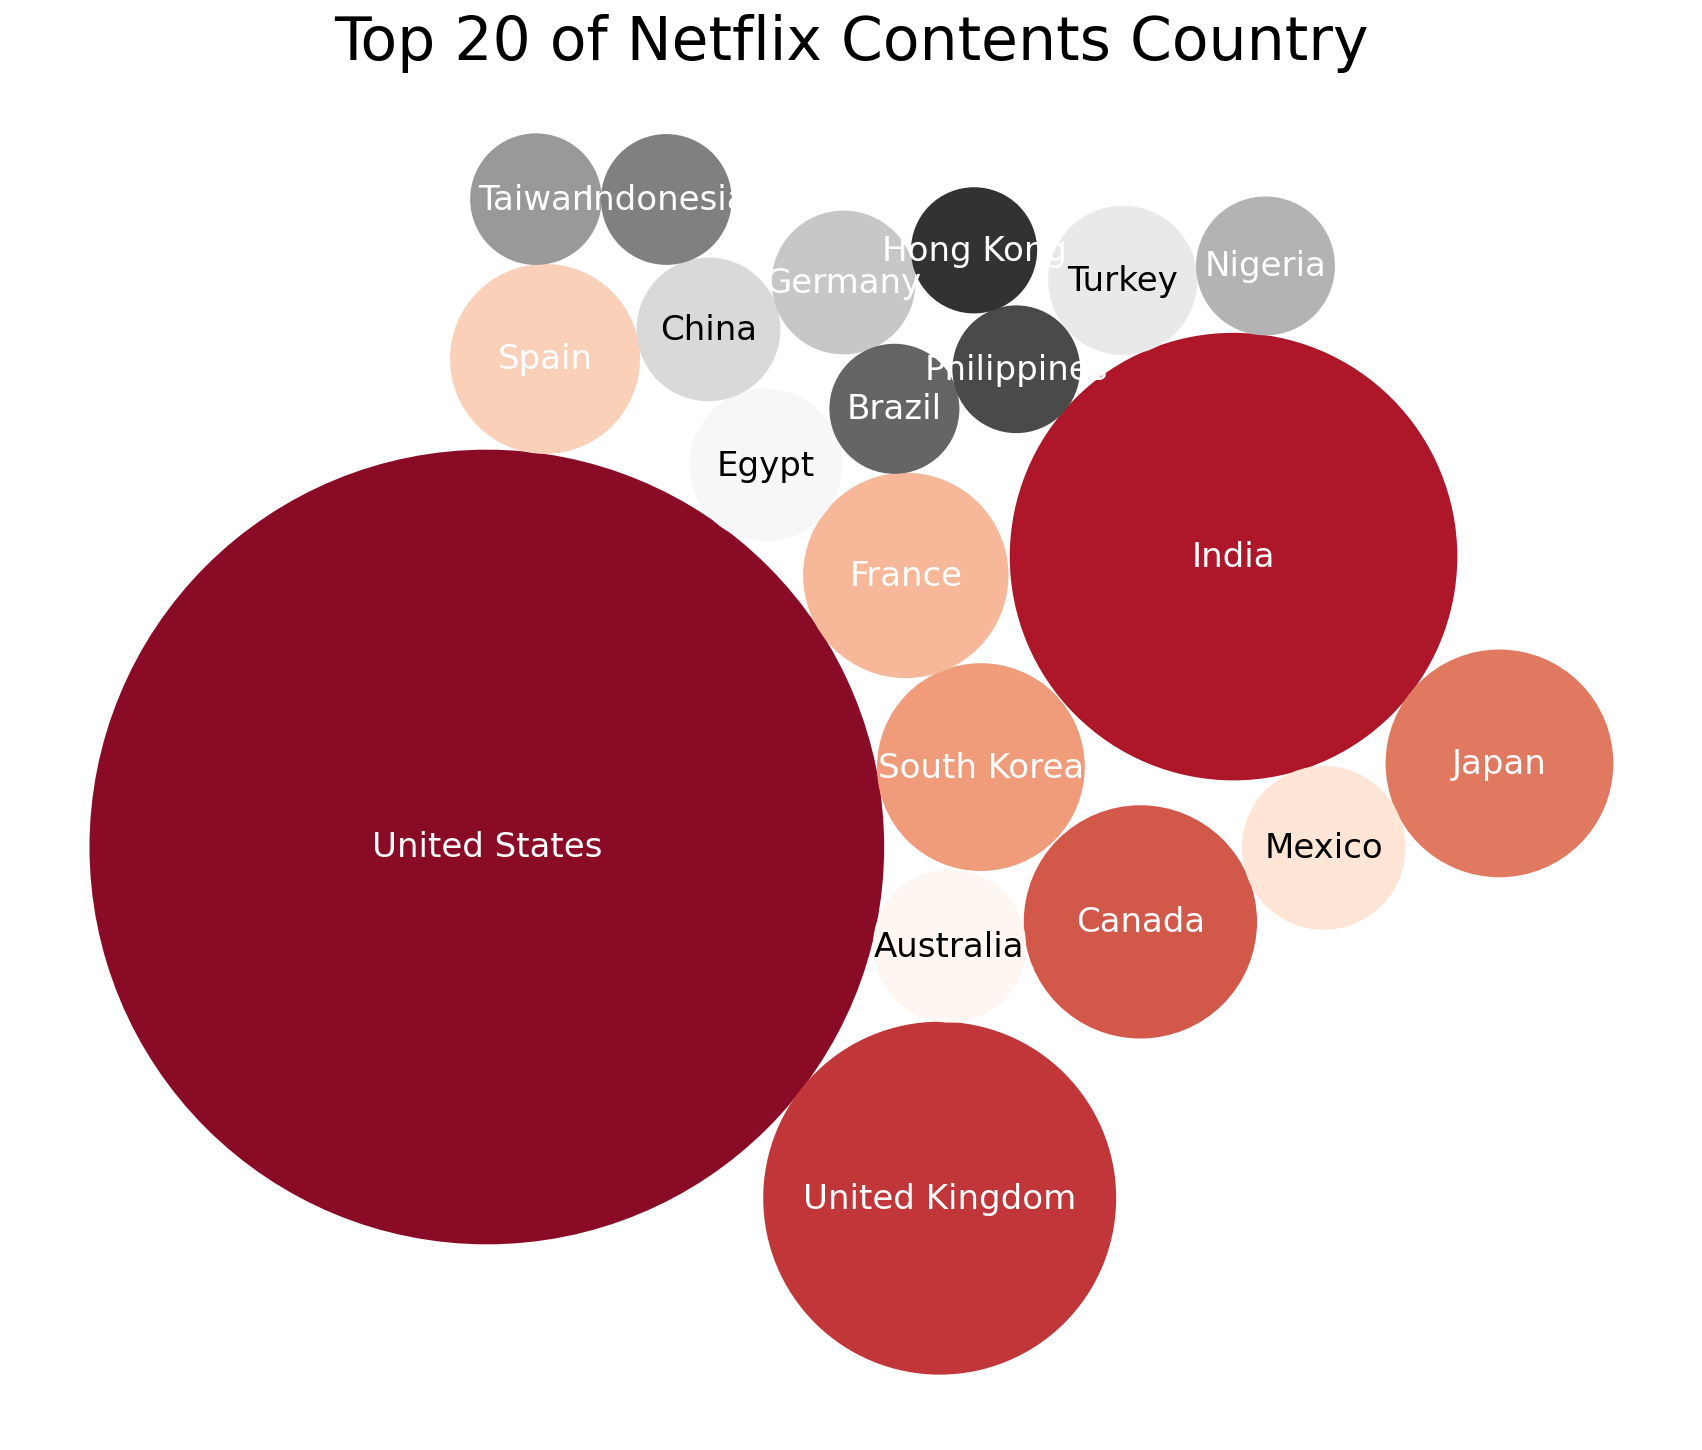

In [29]:
data_country = data['first_country'].value_counts().rename_axis('first_country').reset_index(name='counts')

bubble_chart = BubbleChart(area=data_country['counts'].head(20),
                           bubble_spacing=0.1)

bubble_chart.collapse()
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(15, 15))

bubble_chart.plot(
    ax, data_country['first_country'].head(20), sns.color_palette("RdGy", n_colors=20))

ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Top 20 of Netflix Contents Country', fontsize=30)

plt.show()

## 3)장르수  TOP 15
- TV Show와 Movie의 각 장르 중 작품의 수가 많은 15개의 데이터를 보겠습니다.
- matplotlib의 squarify를 사용하였습니다.

In [30]:
tv_count =tv_genre.sort_values(by = 'count' ,ascending=False).reset_index()
tv_count = tv_count.head(15)

In [31]:
movie_count = mv_genre.sort_values(by = 'count' ,ascending=False).reset_index()
movie_count = movie_count.head(15)

In [32]:
#!pip install squarify

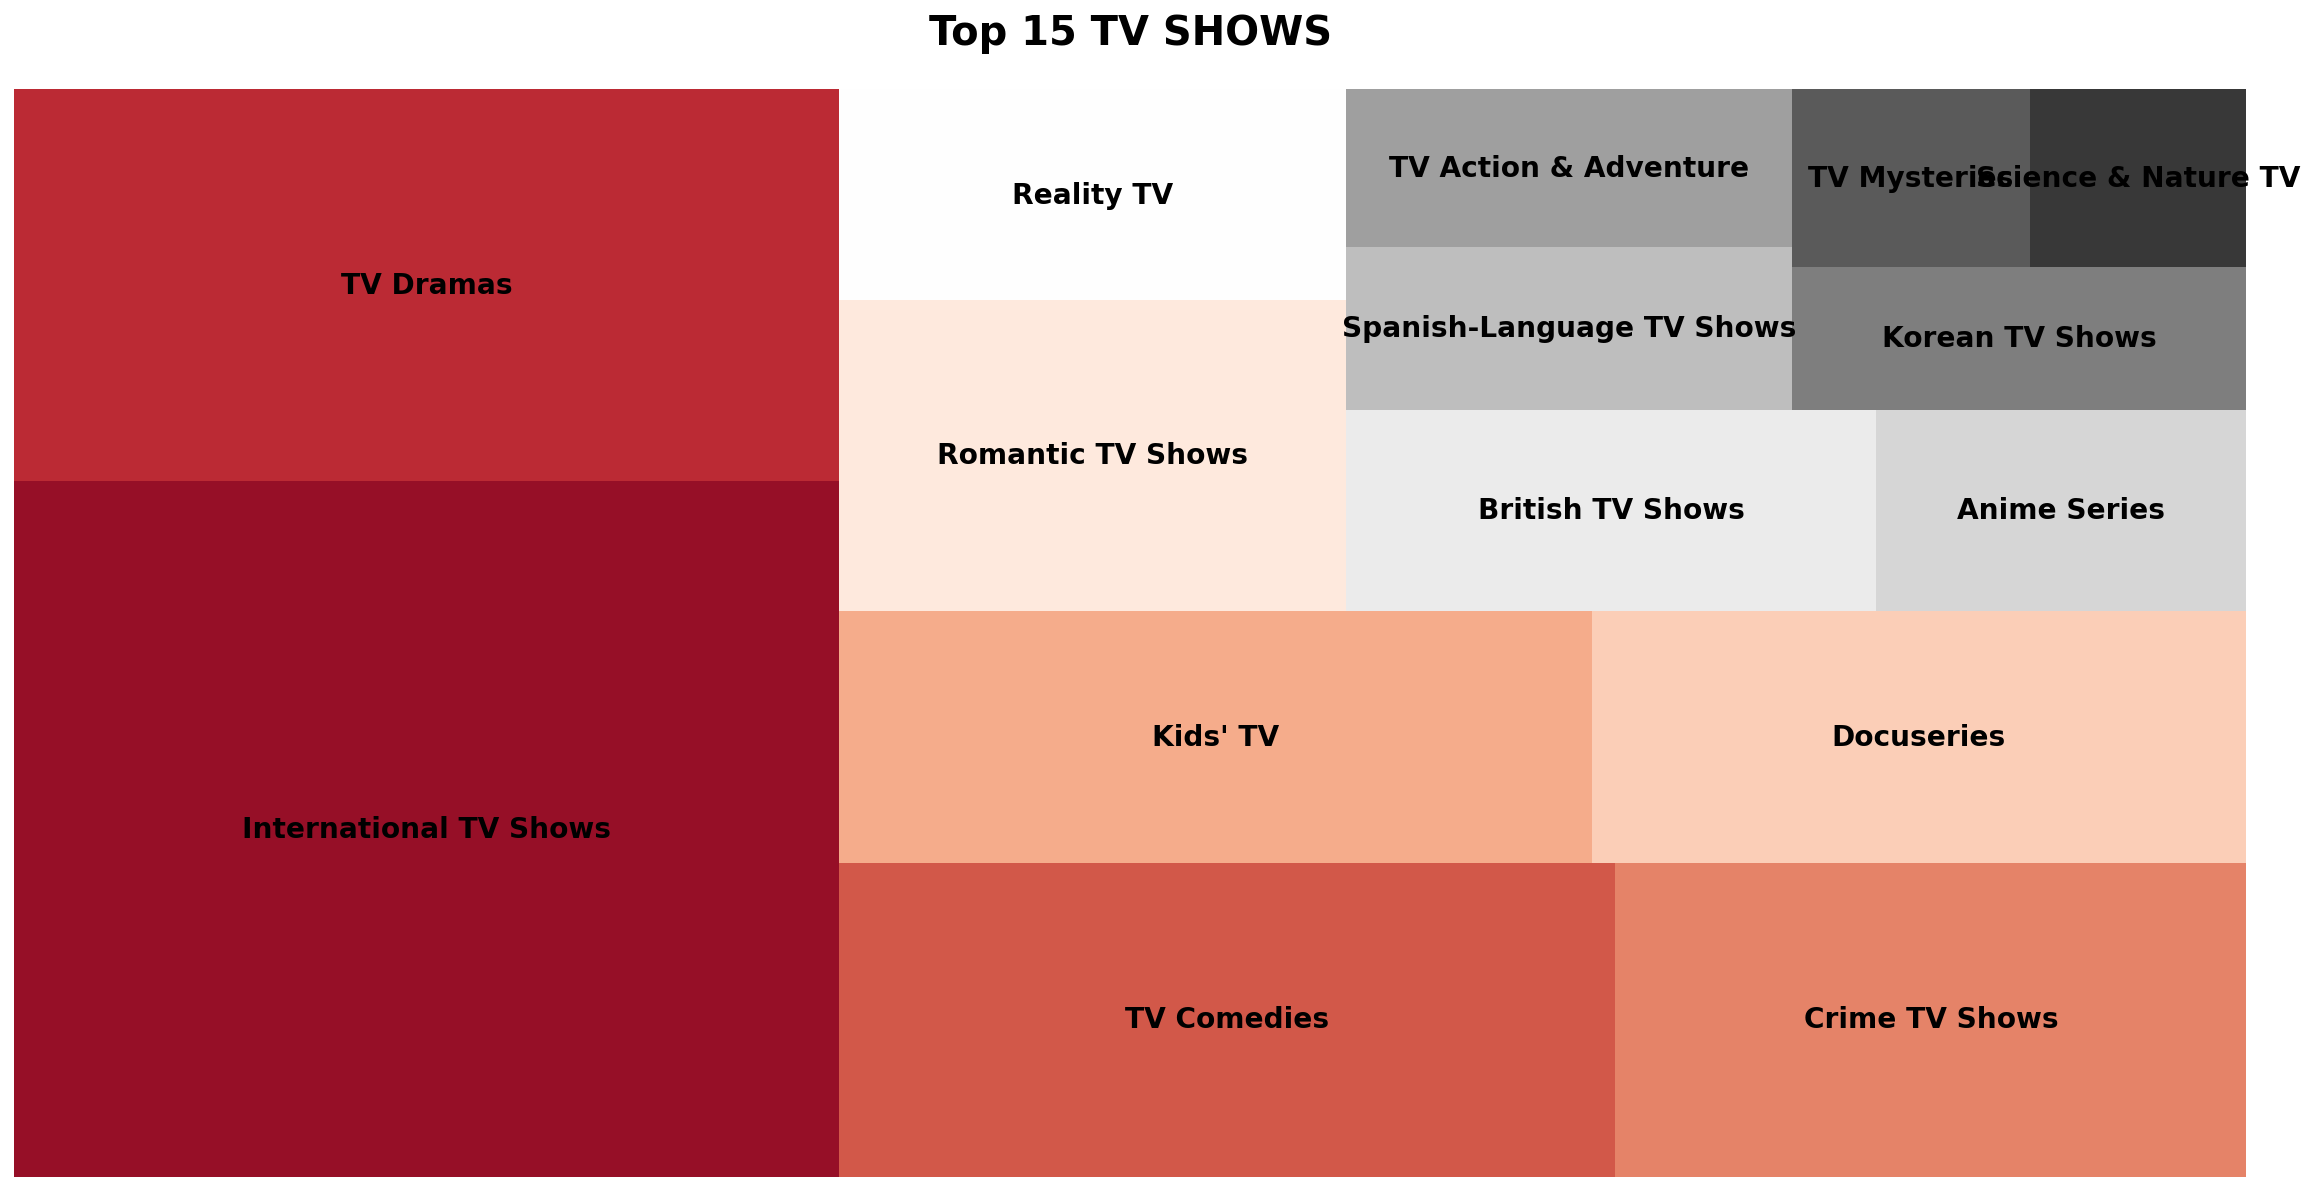

In [33]:
import matplotlib.pyplot as plt
import squarify

fig = plt.figure(figsize=(20, 10))
squarify.plot(sizes = tv_count['count'], label = tv_count['genre'], color=sns.color_palette("RdGy", n_colors=15),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 15 TV SHOWS', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

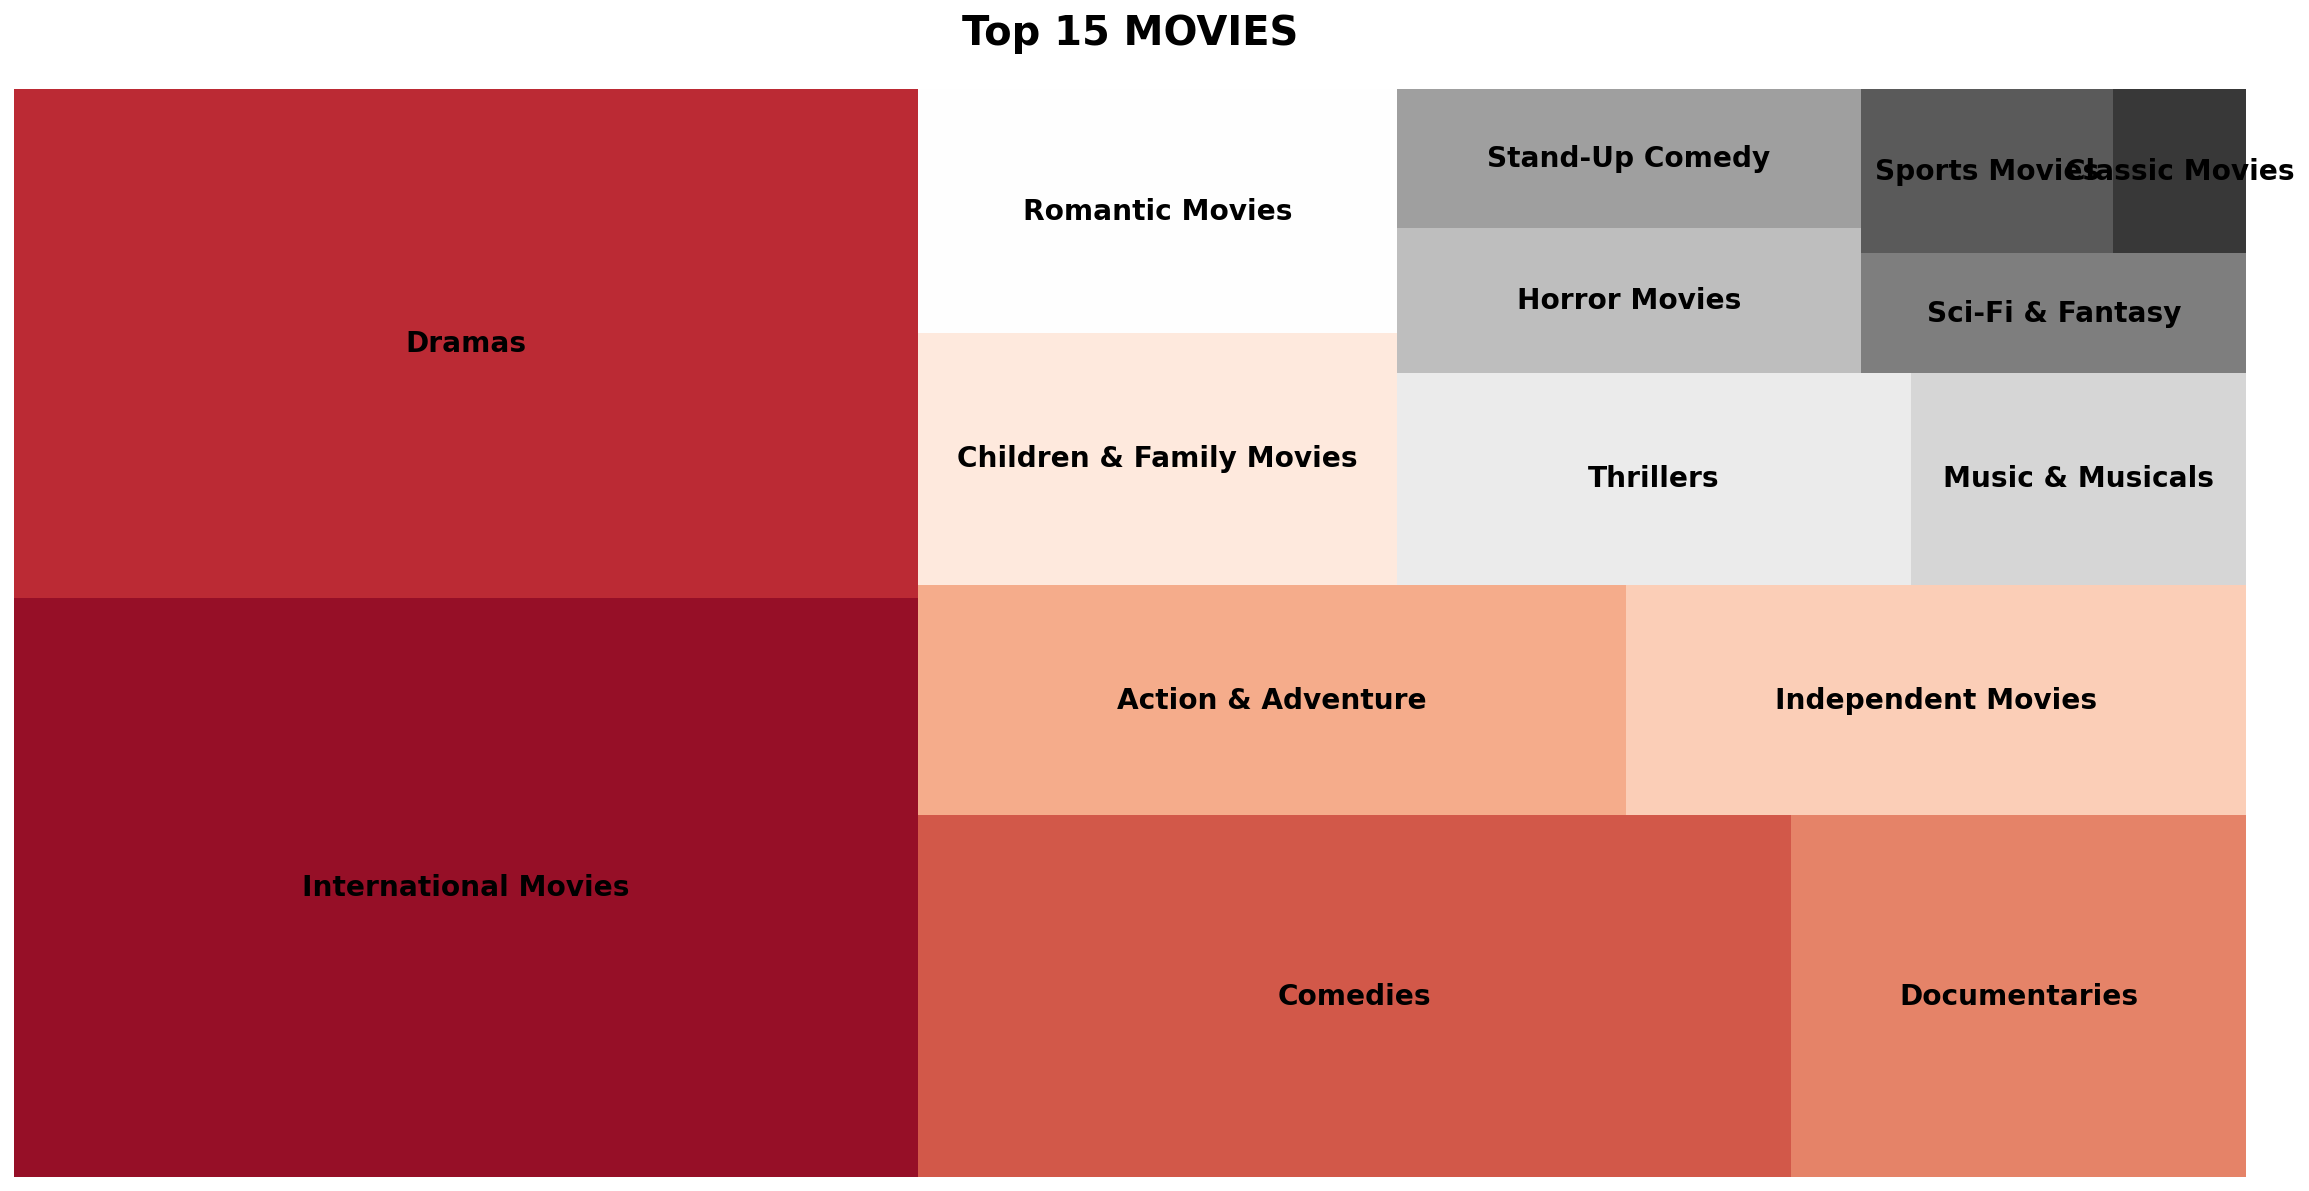

In [34]:
fig = plt.figure(figsize=(20, 10))
squarify.plot(sizes = movie_count['count'], label = movie_count['genre'], color=sns.color_palette("RdGy", n_colors=15),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 15 MOVIES', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

## 4) 연도별 추가된 컨텐츠수


In [35]:
import plotly.graph_objects as go
df_content = data['year'].value_counts().reset_index().rename(columns = {
    'year' : 'count', 'index' : 'year'}).sort_values('year')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv_year = df_tv['year'].value_counts().reset_index().rename(columns = {
    'year' : 'count', 'index' : 'year'}).sort_values('year')
df_tv_year['percent'] = df_tv_year['count'].apply(lambda x : 100*x/sum(df_tv_year['count']))


df_movie_year = df_movie['year'].value_counts().reset_index().rename(columns = {
    'year' : 'count', 'index' : 'year'}).sort_values('year')
df_movie_year['percent'] = df_movie_year['count'].apply(lambda x : 100*x/sum(df_movie_year['count']))

t1 = go.Scatter(x=df_movie_year['year'], y=df_movie_year["count"], name="Movies", marker=dict(color="#4d1114"))
t2 = go.Scatter(x=df_tv_year['year'], y=df_tv_year["count"], name="TV Shows", marker=dict(color="#e50914"))
t3 = go.Scatter(x=df_content['year'], y=df_content["count"], name="Total Contents", marker=dict(color="#142FE0"))

graph_data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"), width=900, height=400)
fig = go.Figure(graph_data, layout=layout)
fig.show()



- 그래프에서 2016년도 부터 추가된 작품의 수가 많아지는 조짐을 보이고있습니다.
- TV Show에 비해 Movie의 수요가 더 많은 것을 알 수 있습니다.
- TV Show의 경우 2017년 400개, 2019년 600개의 작품이 추가되었습니다.
- Movie는 2017년 800개가 넘는 작품이 추가된 후 2019년 1400개가 추가되었지만 그 이후 하락세를 보입니다.


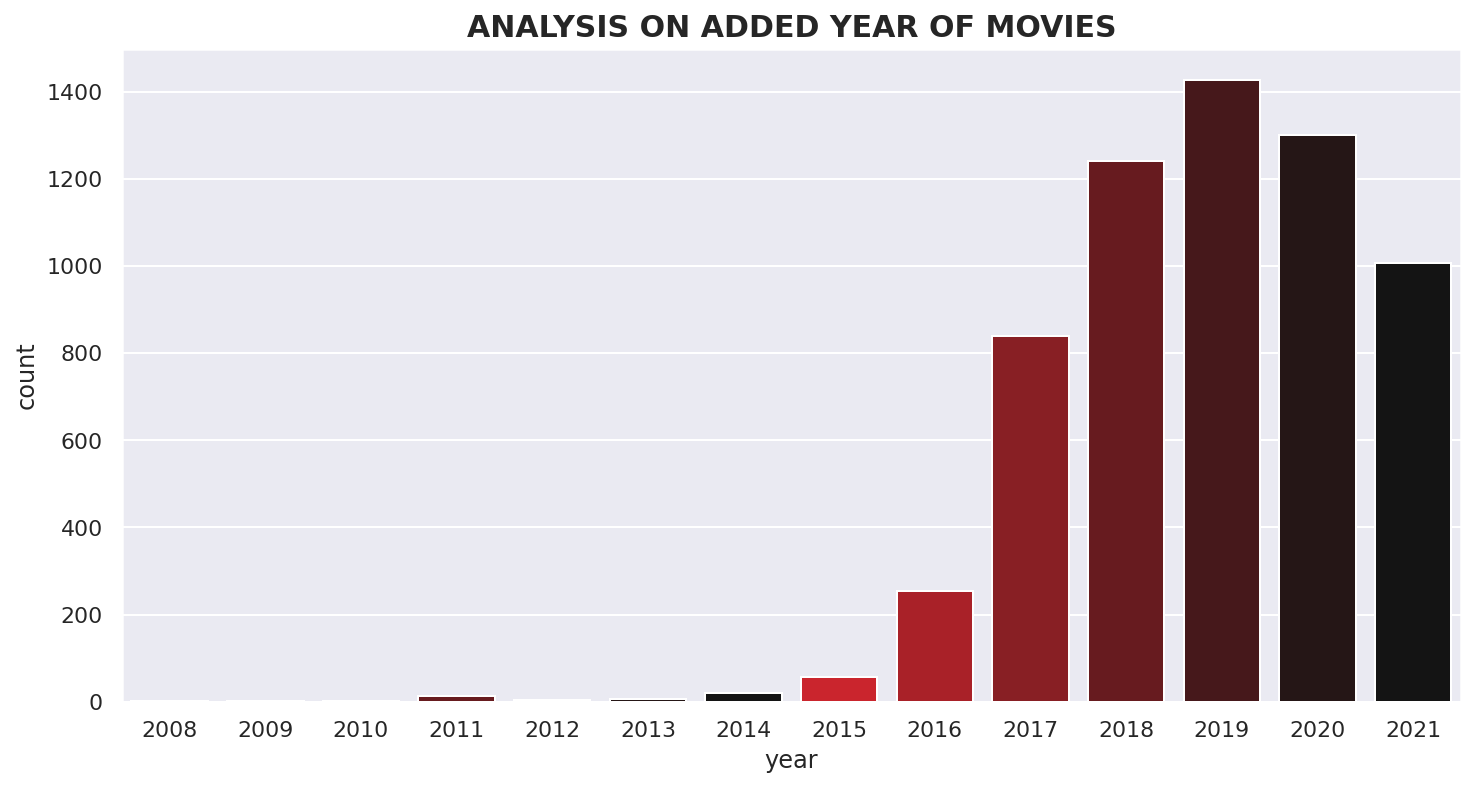

In [36]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="year", data=df_movie, palette= grad) #order=df_movies['year'].value_counts().index[1:15])

plt.title('ANALYSIS ON ADDED YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

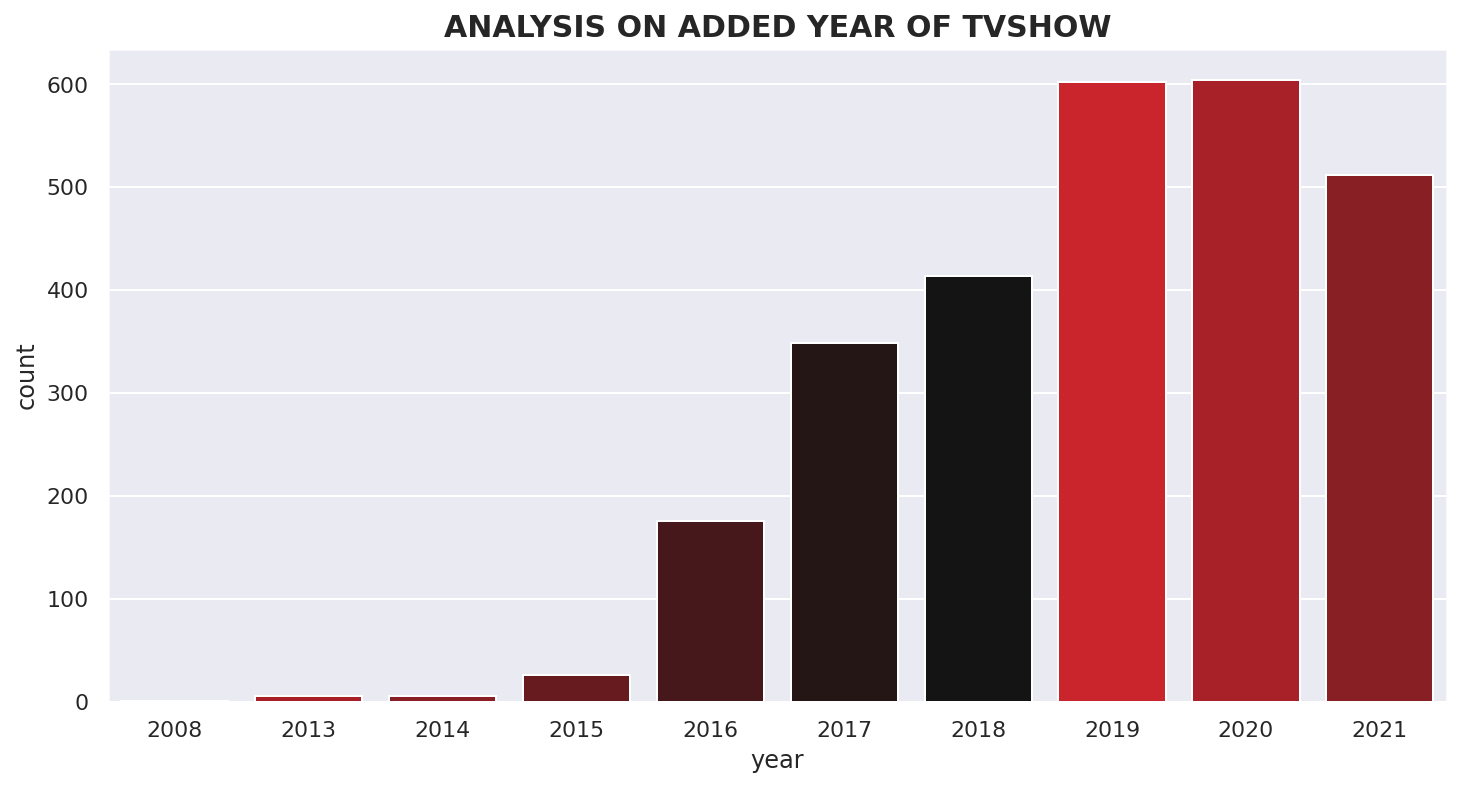

In [37]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="year", data=df_tv, palette= grad) #order=df_movies['year'].value_counts().index[1:15])

plt.title('ANALYSIS ON ADDED YEAR OF TVSHOW', fontsize=15, fontweight='bold')
plt.show()


### 2)연도별 매출 및 손익 트렌드 차트와의 비교 분석

- 2010년이후 넷플릭스는 본격적인 글로벌 공략을 시작하면서 매출이 크게 증가했고 2016년도 부터는 전세계 진출을 밝혔습니다.
- 2016년, 2018년 연속해서 연간 30%가 넘는 고성장을 지속합니다
- 오리지널 콘텐츠에 대한 투자가 어느 정도 가시화되는 2017년부터 넷플릭스 손익이 나면서 손익율도 높아졌습니다. 2019년에는 사상 최고로 높은 9.3% 손익율을 기록했습니다.
- 2019년은 동영상 스트리밍 서비스를 시작하는 경쟁사들이 대거 등장하고, 견제가 심해지면서 넷플릿스 성장세가 약간 꺾인 모습을 보여줍니다.  
(Net Income : 순이익)



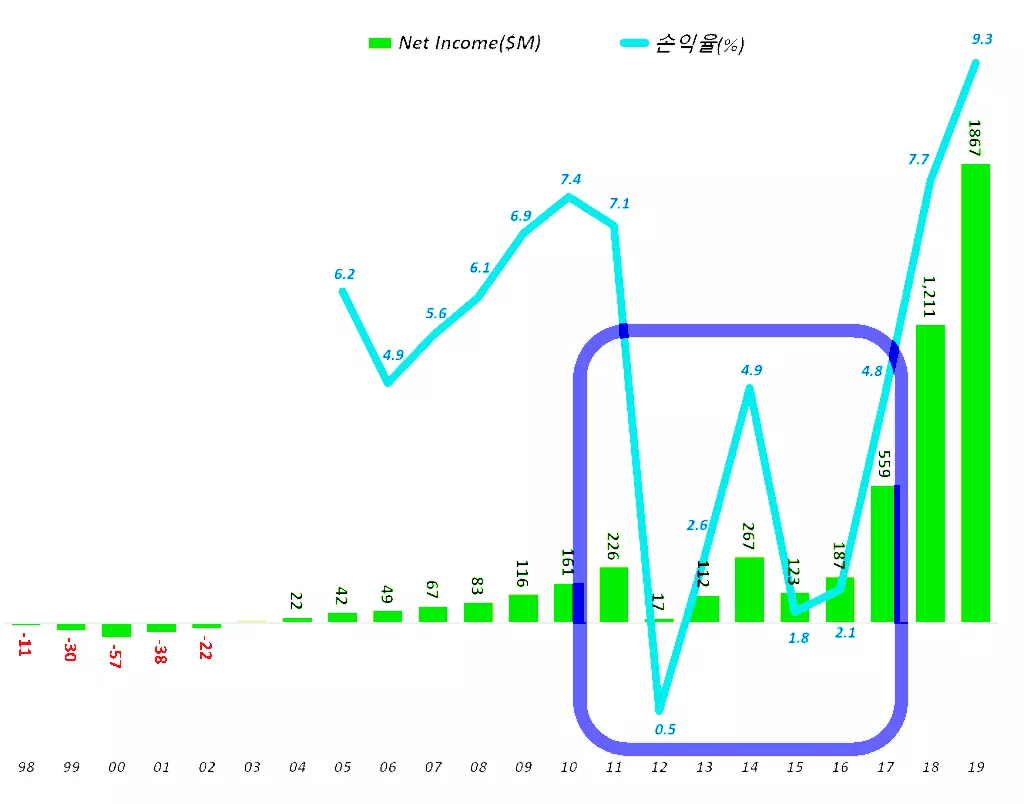

### 넷플릭스 오리지널 컨텐츠 

- 2020년도에는 2019년도 보다 컨텐츠에 대한 투자가 낮아진 모습을 보여줍니다.
- 반면 투자는 적었지만 코로나의 여파로 많은 사람들이 자택에서 오랜시간 지냈었습니다. 그래서 넷플릭스의 구독자 수가 증가한 것을 알 수 있습니다.



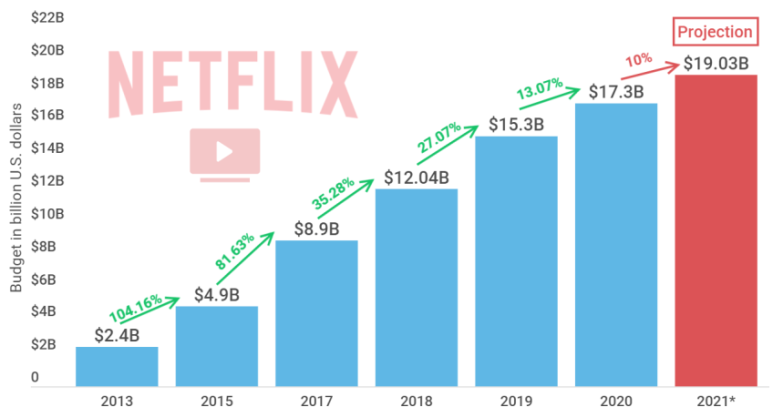

## 5) 세계로 뻗어나가는 넷플릭스
- 세계화 전략을 발표한 넷플릭스가 어떻게 컨텐츠를 늘려나갔는지 보려고 합니다.
- plotly 라이브러리의 choropleth를 사용하면 데이터의 country와 지도의 위치가 매핑되어 쉽게 country별로 얼마나 많은 컨텐츠가 추가되었는지 확인할 수 있습니다.

In [38]:
import plotly.express as px

# 연도, 나라에 따른 count 그룹화
year_country = data.groupby('year')['first_country'].value_counts().reset_index(name='counts')

# 연도별 비는 나라 추가
all_country = year_country['first_country'].unique()
for year in range(2008, 2022):
  years_country = year_country[year_country['year']==year]['first_country'].unique()
  add_country = np.setdiff1d(all_country, years_country)
  
  for country in add_country:
    year_country = year_country.append({'year': year, 'first_country':country, 'counts':0},ignore_index=True)

# 나라별 연도에 따른 누계값 계산
year_country = year_country.sort_values(by = ['year', 'first_country'])
year_country['cnt_csum'] = year_country.groupby(['first_country'])['counts'].cumsum()
year_country.drop(year_country.loc[year_country['cnt_csum']==0].index, inplace=True)

# 그리기
fig = px.choropleth(year_country, locations="first_country", color="cnt_csum", 
                    locationmode='country names',
                    animation_frame='year',
                    range_color=[0,400],
                    color_continuous_scale=px.colors.sequential.OrRd,
                    width = 1100, height = 600)

fig.update_layout(title='Expansion of Netflix', font_size=14)
fig.plotly_relayout
fig.show()

## 6) 연도별, 달별 추가된 장르의 분포도 확인
- 이제 장르에 조금 더 초점을 두고 데이터를 확인해 보겠습니다.
- 위에서 사용했던 장르별 작품 수를 세는 함수로는 다른 칼럼과의 관계를 확인할 수가 없습니다.
- 그렇기 때문에 연도나 다른 칼럼별로 장르를 세분화 할 수 있도록 함수를 추가하였습니다.

In [39]:
def genre_count_2cols(df, col):
    
    genre_cols = df[[col, 'listed_in']].value_counts()
    
    gener = {}
    
    for idx, val in genre_cols.items():
        i_col = str(idx[0])
        l = idx[1].split(',')
        for i in l:
            genre_split = i.strip()
            key = i_col + ':' + genre_split
            if i in gener.keys():
                d = {}
                d[key] = val + gener[key]
                gener.update(d)
            else:
                d = {key:val}
                gener.update(d)
    cols, theme, count = [], [], []
    
    for idx, val in gener.items():
        cols.append((idx.split(':')[0]))
        theme.append(idx.split(':')[1])
        count.append(val)
    
    list_temp = (pd.DataFrame({col: cols, 'genre':theme, 'count': count})
        .sort_values('count', ascending = True))
    list_temp.reset_index(drop = True, inplace = True)
    
    return list_temp

- 해당 함수로 연도별로 어떠한 장르가 많이 추가되었는지 확인해 보겠습니다.

In [40]:
# 분해하여 갯수 셈
year_genre_tv = genre_count_2cols(df_tv, 'year')
year_genre_tv = year_genre_tv.sort_values(by=['year', 'genre'])

year_genre_mv = genre_count_2cols(df_movie, 'year')
year_genre_mv = year_genre_mv.sort_values(by=['year', 'genre'])

# 그룹별 높은 수 5개씩 추출
top_year_count_tv = year_genre_tv.groupby('year').apply(lambda x: x.nlargest(5, 'count'))
top_year_count_mv = year_genre_mv.groupby('year').apply(lambda x: x.nlargest(5, 'count'))

# index 삭제
top_year_count_tv = top_year_count_tv.droplevel(axis=0,level=0)
top_year_count_tv = top_year_count_tv.sort_values(by='year')

top_year_count_mv = top_year_count_mv.droplevel(axis=0,level=0)
top_year_count_mv = top_year_count_mv.sort_values(by='year')

# year, month 정수로 변환
top_year_count_tv = top_year_count_tv.astype({'year':'int'})
top_year_count_mv = top_year_count_mv.astype({'year':'int'})

- 해당 데이터를 이용해 연도별로 장르의 비율을 정규화하여 Stacked Barplot으로 표현하고자 합니다.
- seaborn이나 plotly를 사용하여 표현하고 싶었으나 데이터 전처리 과정이 복잡하여 이를 쉽게 표현할 수 있는 altair라이브러리를 사용하였습니다.

In [41]:
#연도별 장르 추가 분포도(Movie)
import altair as alt

alt.Chart(top_year_count_mv).mark_bar().encode(
    x='year:N',
    y=alt.Y('sum(count)', stack="normalize", sort="ascending"),
    color = alt.Color("genre", scale=alt.Scale(scheme='redgrey'))).properties(
    width=700,
    height=400,
    title="Added Movie's Genre by Year").configure_title(fontSize=30)


alt.Chart(...)

- 컨텐츠가 많이 추가되기 시작한 2016년 부터 데이터를 살펴보겠습니다.
- 2019년 까지는 큰 비중이 없던 스탠드 업 코미디의 비중이 2020년부터 급격하게 늘어났습니다.

#### 이러한 이유가 뭘까 하고 스탠드 업 코미디에 대해 알아봤습니다.
- 스탠드 업 코미디는 미국에서 인기 많은 문화중 하나로 코로나 팬데믹으로 인해 공연이 어려워져서 넷플릭스의 컨텐츠로써 많은 제작이 이루어지지 않았는가 하는 생각을 했습니다.
- '스탠드 업 코미디가 다른 컨텐츠보다 제작비용이 적게 투입되므로 넷플릭스에서 본격적으로 투자를 늘렸다.(2017년 기사)'고 한 부분도 영향을 미친 것으로 보입니다.


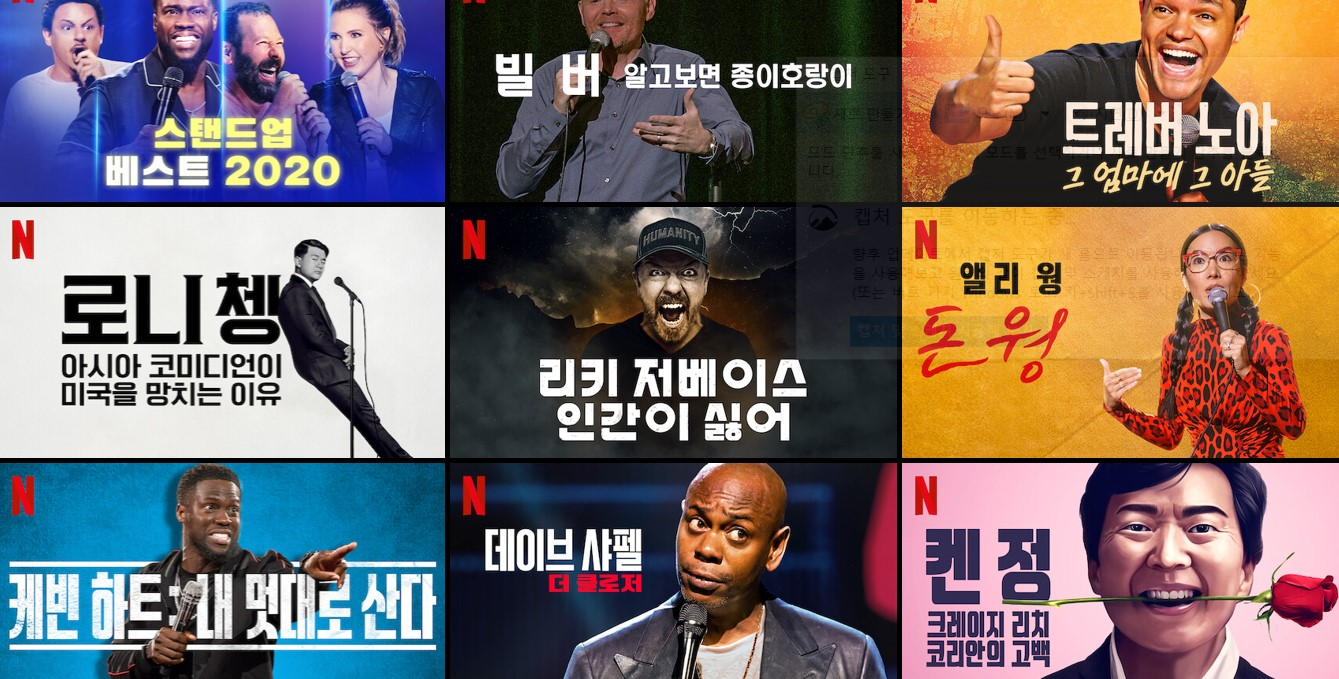

In [42]:
#연도별 장르 추가 분포도(TV Show)
import altair as alt

alt.Chart(top_year_count_tv).mark_bar().encode(
    x='year:N',
    y=alt.Y('sum(count)', stack="normalize", sort="ascending"),
    color = alt.Color("genre", scale=alt.Scale(scheme='redgrey'))).properties(
    width=700,
    height=400,
    title="Added TV Show's Genre by Year").configure_title(fontSize=30)


alt.Chart(...)

- TV Show는 추가되는 컨텐츠의 비율이 일정해 보입니다.

## 7) 장르별 평균 평점 BEST 10 시각화
- 이제 위에서 이야기 했던 장르를 평점과 함께 비교해 보겠습니다.
- 그리고 각 장르별 평균 평점을 계산해서 시각화 해보겠습니다.

In [43]:
# 별점 구간화했던 데이터프레임의 결측치 확인
print(df_temp_movie.isnull().sum())
print(df_temp_tv.isnull().sum())

show_id         0
type            0
listed_in       0
IMDB         2653
IMDB_band       0
dtype: int64
show_id        0
type           0
listed_in      0
IMDB         892
IMDB_band      0
dtype: int64


In [44]:
# 별점 컬럼의 결측치를 제거
df_temp_movie = df_temp_movie.dropna(axis=0)
df_temp_tv = df_temp_tv.dropna(axis=0)

In [45]:
# 불필요한 컬럼 제거
df_movie_IMDB = df_temp_movie.drop(['type','IMDB'], axis=1)
df_tv_show_IMDB = df_temp_tv.drop(['type','IMDB'], axis=1)
df_movie_IMDB

show_id                                          listed_in  IMDB_band
1915   s1887                                      Documentaries         10
836     s827                                    Stand-Up Comedy          9
2526   s2488             Comedies, Dramas, International Movies          9
917     s908                                      Documentaries          9
3583   s3532               Comedies, Dramas, Independent Movies          9
...      ...                                                ...        ...
2663   s2625                     Comedies, International Movies          2
1120   s1107                                 Action & Adventure          2
4503   s4443  Action & Adventure, Comedies, International Mo...          2
923     s914      Dramas, International Movies, Romantic Movies          2
2594   s2556             International Movies, Sci-Fi & Fantasy          2

[3520 rows x 3 columns]

영화 별점분포

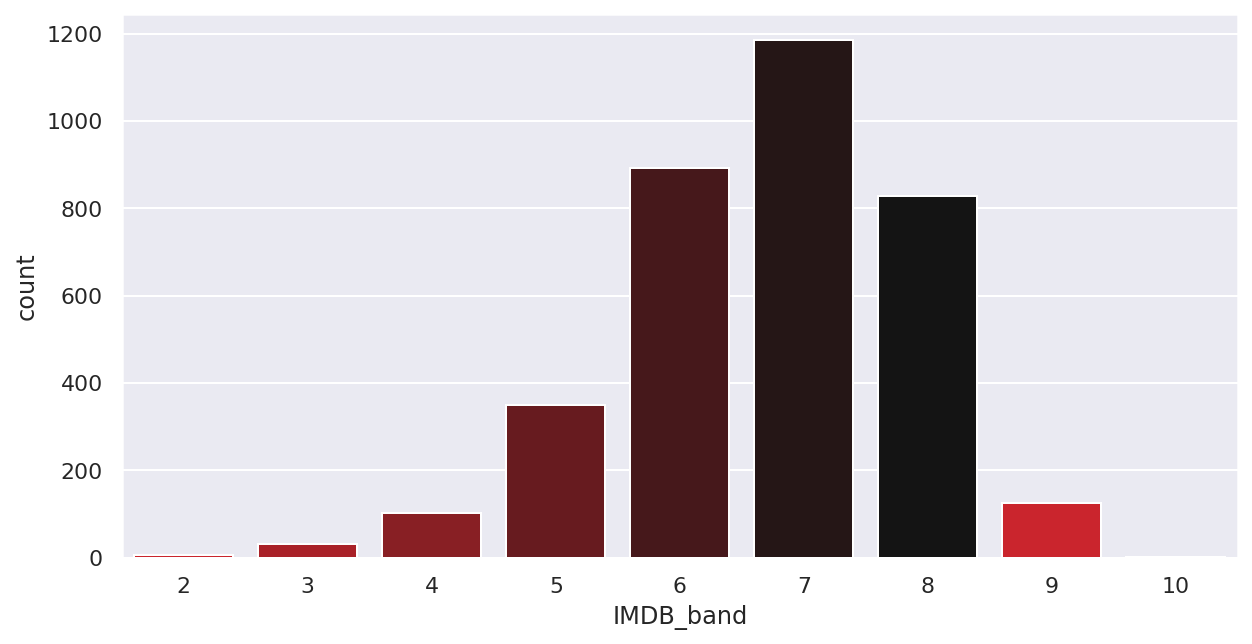

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x='IMDB_band', data=df_movie_IMDB,palette = grad)

TV Show 별점분포

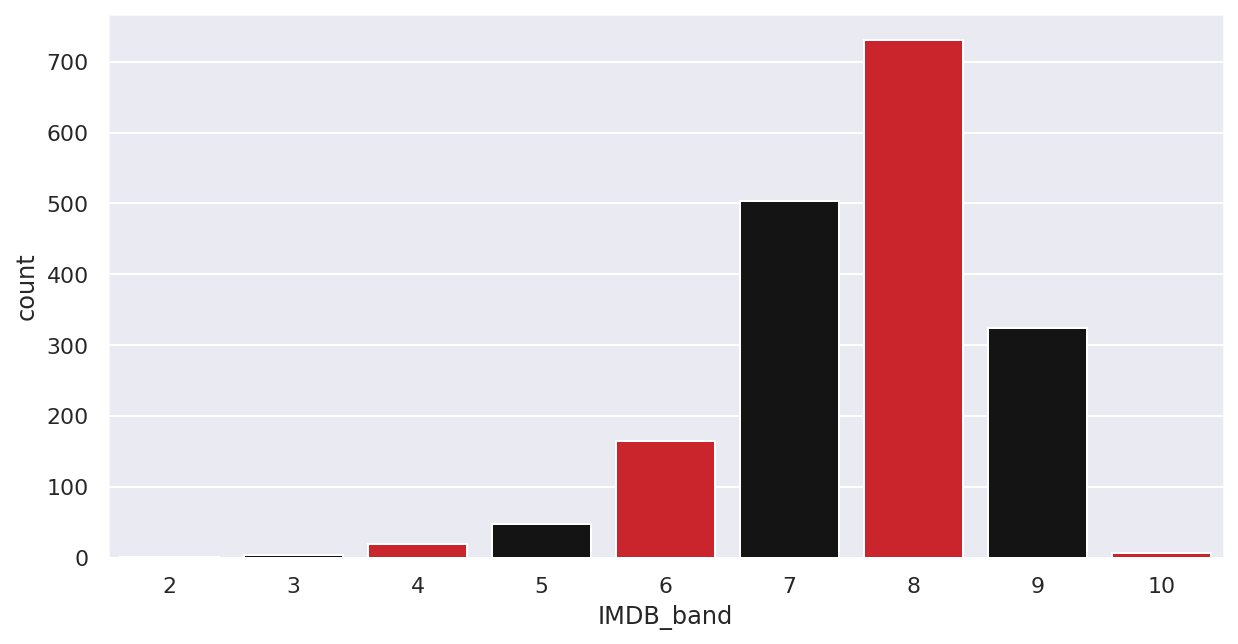

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x='IMDB_band', data=df_tv_show_IMDB, palette = colors)

TV Show와 Movie의 평균평점 계산
- 함수 자체가 장르별 개수를 세어 주는 함수라서, 평균을 내려면 장르별 총 평점과 총 개수를 계산해서 나눠주는 방법을 사용했습니다.
- (해당 장르의 평점 합계) / (해당 장르의 작품 수)

TV Show

In [48]:
# 위에서 선언했던 장르별 개수를 count하는 함수를 이용, 각 장르별 평점별 개수를 셌습니다.
df_tv_show_IMDB = genre_count_2cols(df_tv_show_IMDB,'IMDB_band')
# 구간화 한 컬럼의 요소 자료형이 object임
df_tv_show_IMDB.info()
# 계산하기 위해 int형으로 바꿔줌
df_tv_show_IMDB = df_tv_show_IMDB.astype({'IMDB_band':'int'})
# 장르별 평점의 총점 계산
df_tv_show_IMDB['total'] = (df_tv_show_IMDB['IMDB_band']*df_tv_show_IMDB['count'])
# (해당 장르의 평점 합계) / (해당 장르의 작품 수) 
grouped_tv = df_tv_show_IMDB.groupby('genre')
grouped_tv = grouped_tv.sum().reset_index()
grouped_tv['mean'] = (grouped_tv['total'] / grouped_tv['count'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IMDB_band  140 non-null    object
 1   genre      140 non-null    object
 2   count      140 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.4+ KB


Movie

In [49]:
# 위에서 선언했던 장르별 개수를 count하는 함수를 이용, 각 장르별 평점별 개수를 셌습니다.
df_movie_IMDB = genre_count_2cols(df_movie_IMDB,'IMDB_band')
# 구간화 한 컬럼의 요소 자료형이 object임
df_movie_IMDB.info()
# 계산하기 위해 int형으로 바꿔줌
df_movie_IMDB = df_movie_IMDB.astype({'IMDB_band':'int'})
# 장르별 평점의 총점 계산
df_movie_IMDB['total'] = (df_movie_IMDB['IMDB_band']*df_movie_IMDB['count'])
# (해당 장르의 평점 합계) / (해당 장르의 작품 수) 
grouped_mov =df_movie_IMDB.groupby('genre')
grouped_mov = grouped_mov.sum().reset_index()
grouped_mov['mean'] = (grouped_mov['total'] / grouped_mov['count'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IMDB_band  133 non-null    object
 1   genre      133 non-null    object
 2   count      133 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ KB


TV Show 장르별 평점 분포 TOP 10

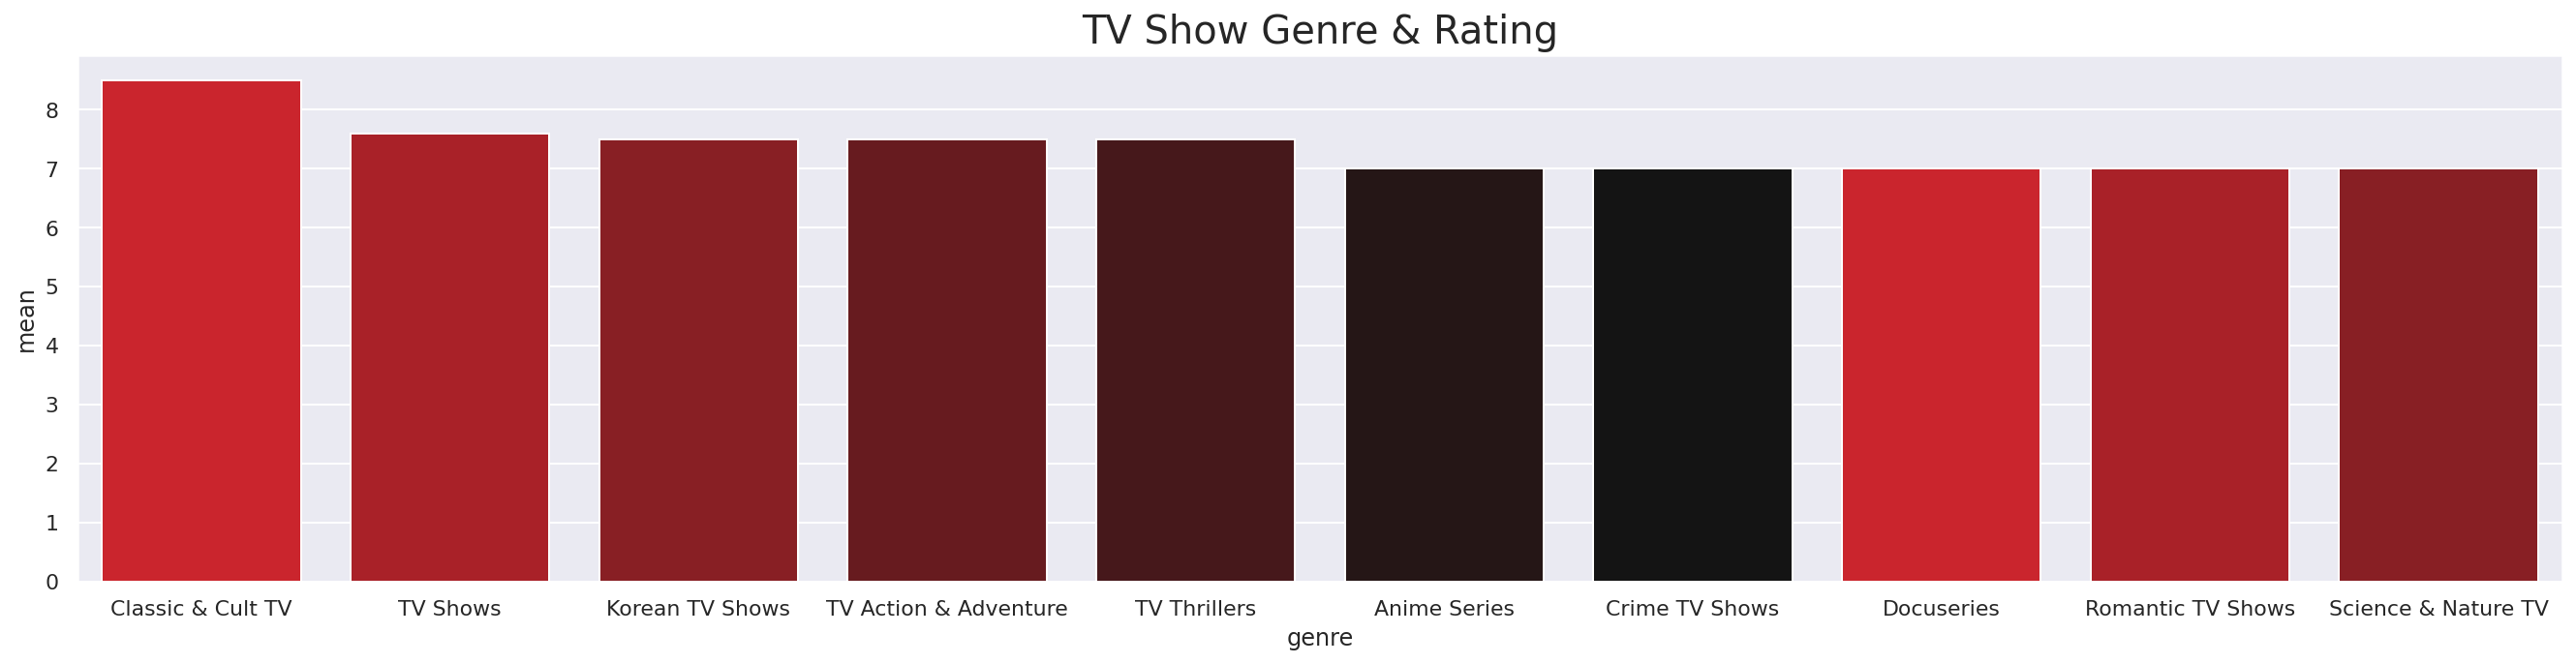

In [50]:
plt.figure(figsize=(23,5))
plt.title('TV Show Genre & Rating', fontsize=20)
sns.barplot(data=grouped_tv.nlargest(10, 'mean'), x = "genre", y = "mean",palette = grad)
sns.set(font_scale=1)
# .nlargest(5, 'IMDB_band')

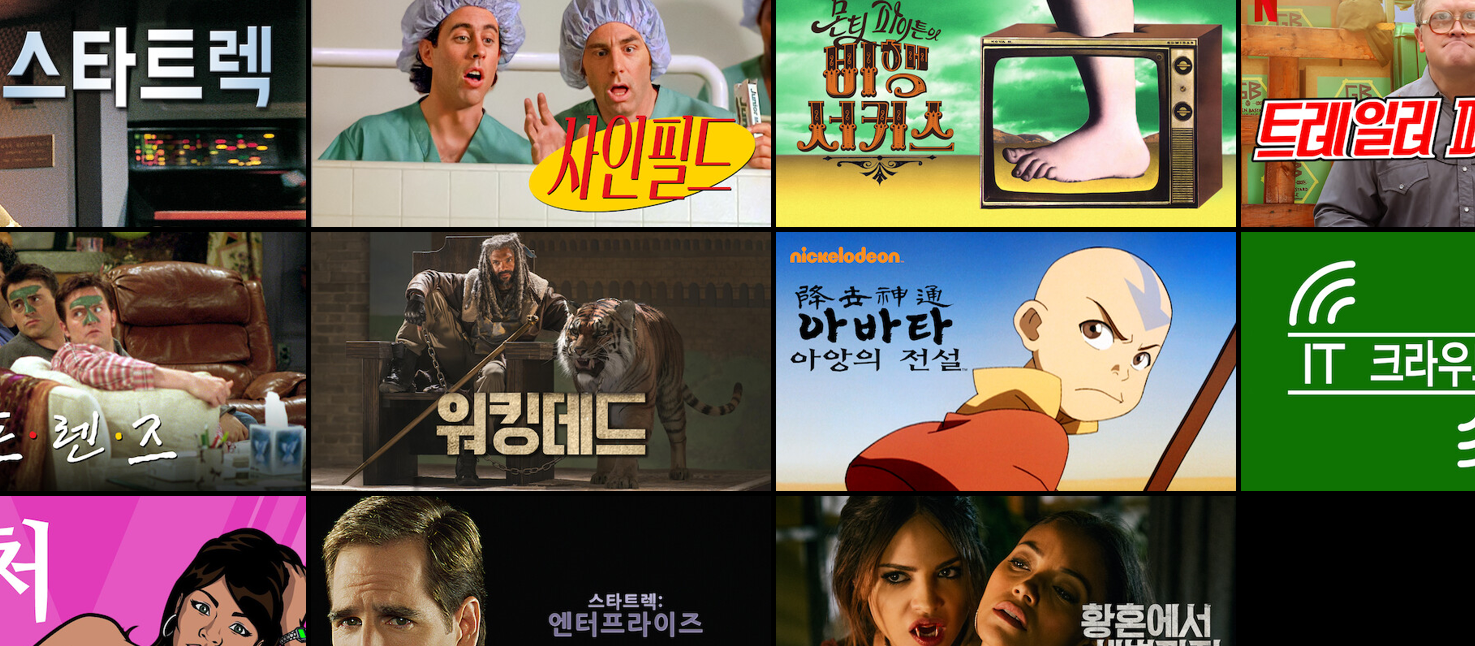

Movie 장르별 평점 분포 TOP 10

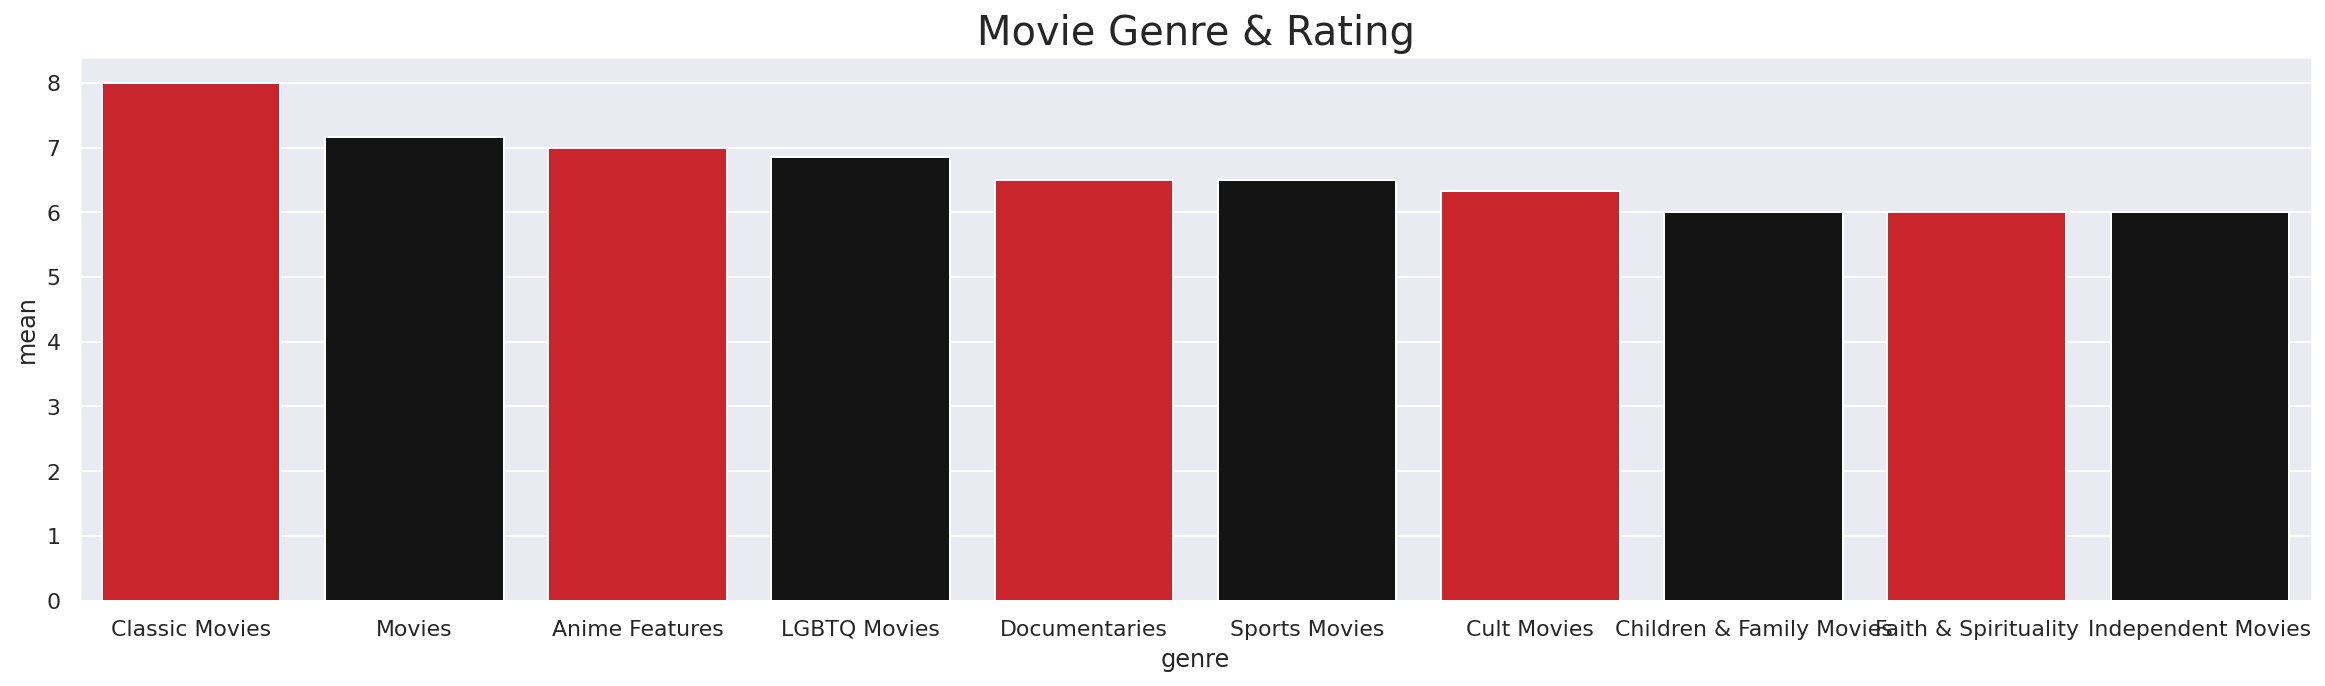

In [51]:
plt.figure(figsize=(20,5))
#plt.ylim(8,11)
plt.title('Movie Genre & Rating', fontsize=20)
sns.barplot(data=grouped_mov.nlargest(10, 'mean'), x = "genre", y = "mean",palette = colors)
sns.set(font_scale=1)
# .nlargest(5, 'IMDB_band')

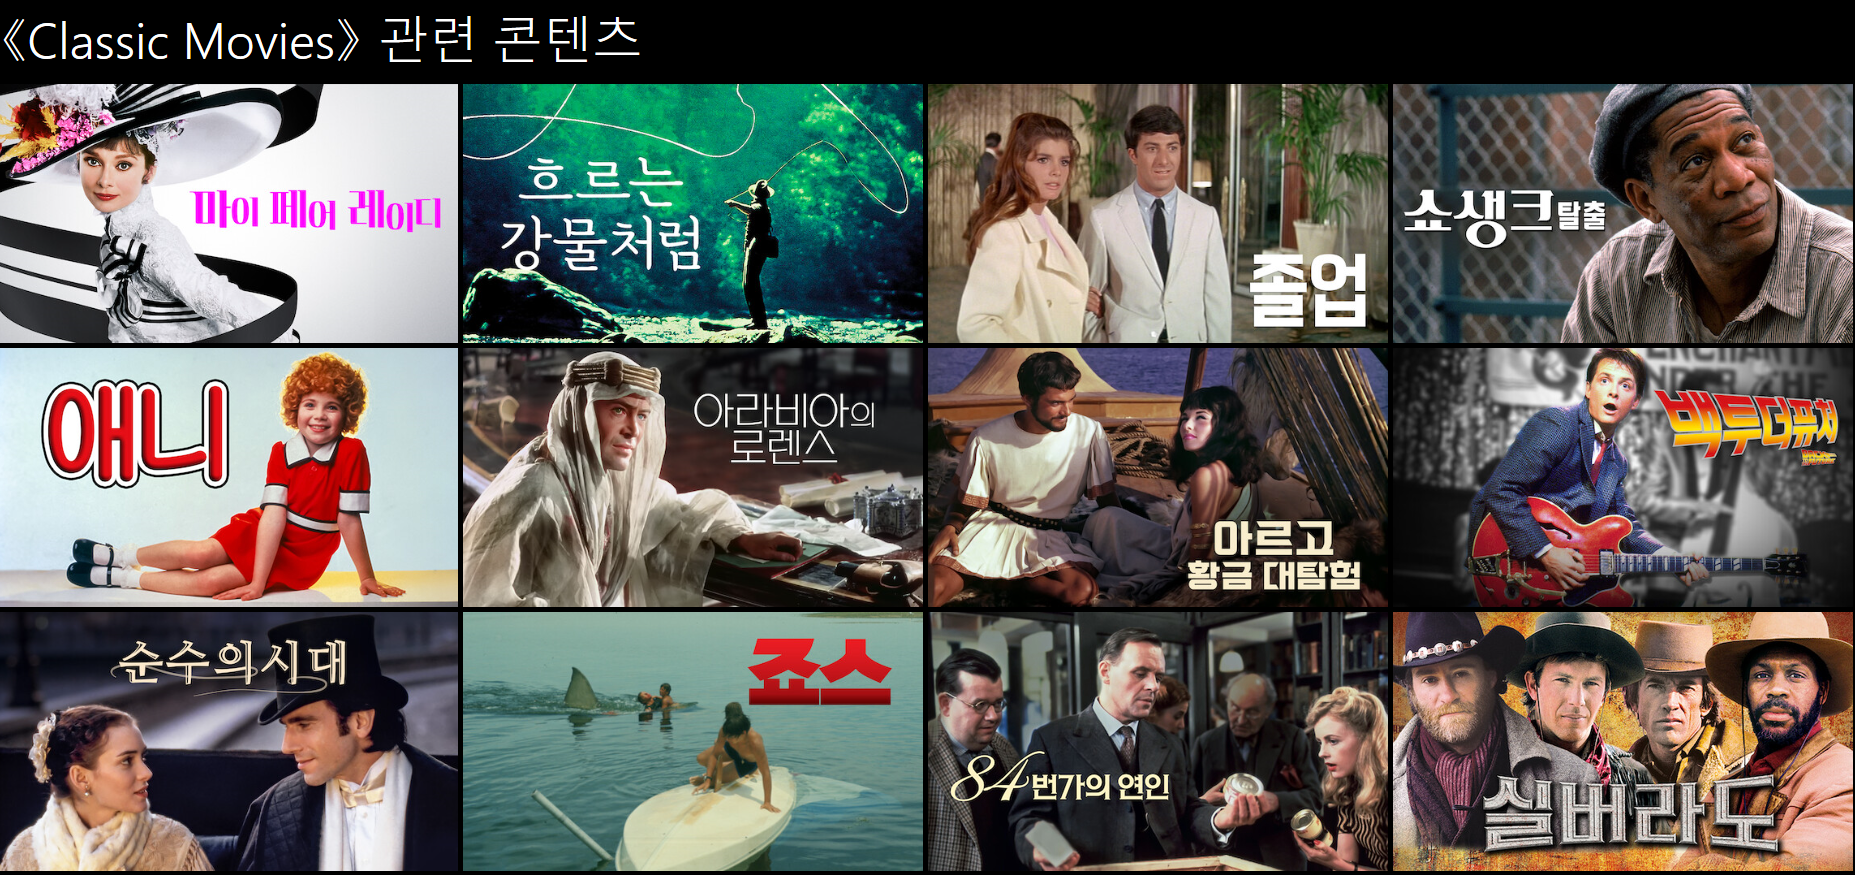

연도별 평점 분포 시각화
- seaborn 라이브러리의 kdeplot을 사용
- 면적이 밀도 (적분값)

In [52]:
#시각화하기 위해 df_rating 데이터프레임에서 원하는 컬럼을 가져와서 평점 결측치 제거
df_y_r = df_rating[['show_id','type','IMDB','IMDB_band']]
df_y_r = df_rating.dropna(axis=0)

Text(0.5, 1.0, 'Year & Rating')

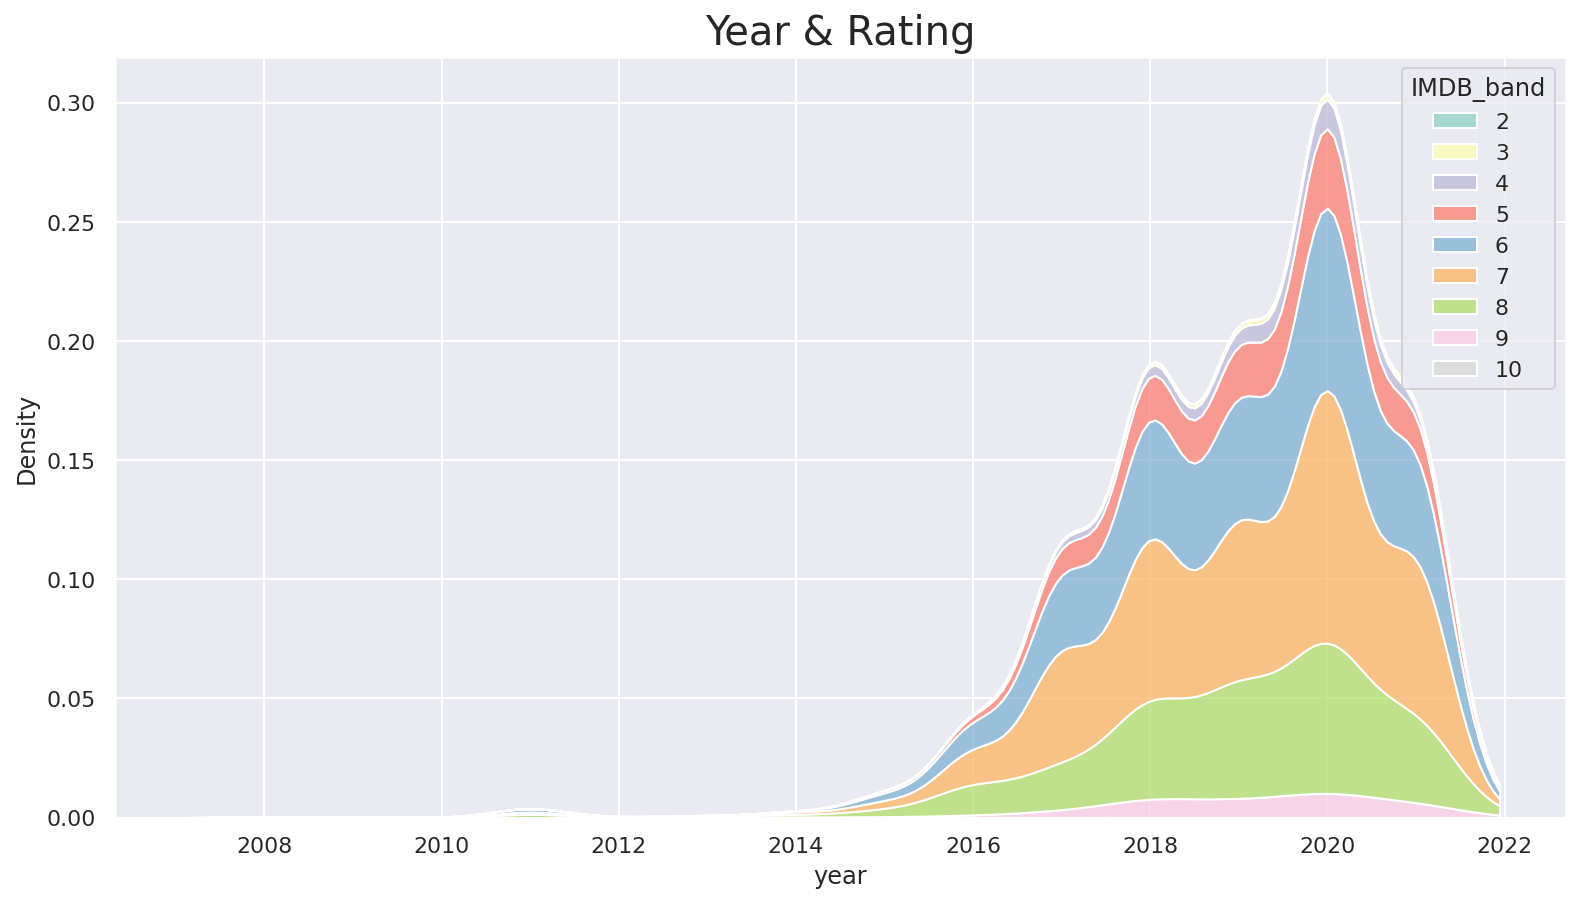

In [53]:
plt.figure(figsize=(13,7))
sns.kdeplot(data=df_y_r, x='year', hue = 'IMDB_band', multiple="stack", palette = 'Set3')
plt.title('Year & Rating', fontsize=20)
# 면적이 밀도 / 8점 7점 6점 비율이 높은 것을 알 수 있다.

- 색상 면적이 밀도인 kdeplot
- 파란색, 주황색, 초록색 면적이 큰 편인데, 각각 6점 7점 8점이므로 해당 평점의 작품 비중이 많은 것을 알 수 있습니다.
- 그리고 2020년 총 밀도가 가장 많아진 것을 볼 수 있는데, 앞서 19년과 20년에 추가된 컨텐츠 수가 많았던 영향이라고 생각됩니다. 

# 회고
### 이주미
1. 넷플릭스에 대해 잘 안다고 생각했는데, 막상 데이터를 분석해 보니 처음 보는 작품이 평점 상위 랭크에 있는 등의 결과가 의외였다. 데이터톤 끝나고 해당 작품 도장깨기각
2. 개인적으로 생각했던 추정 그래프와 결과가 다르게 나와서 생각한 방향으로 프로젝트를 진행하기 어려웠던 때도 있었지만 조원들과 잘 협업한 결과 더 좋은 방향을 찾을 수 있어서 좋았다.
3. 더 화려한 시각화를 해보고 싶었는데 기본 그래프가 특징을 더 잘 설명할 때가 있어서 좀 아쉬운 점이었다. 역시 기본 그래프들을 잘 활용하는 것이 다음 단계로(화려한 시각화) 나아가는 출발점이라고 생각한다.
4. 가장 중요한 게 데이터 전처리와 데이터프레임 다루는 스킬이라는 것을 깨달았다. 나의 한계를 느꼈다.
5. 조원들과 손발이 잘 맞아서 처음부터 끝까지 꽤(?) 순조로운 프로젝트였다. 즐거웠다 🤩

### 심성보
1. 데이터톤 동안 질리도록 넷플릭스의 데이터를 쳐다보게 되었다. 이제 한동안 넷플릭스를 안봐도 될 것 같은 기분이 든다. 
2. 캐글이나 익스노드를 하면서 seaborn을 많이 사용했었는데 plotly를 사용해 보니 와 이런게 되네 하는 생각이 들게 하는 깔끔하고 멋진 그래프들이 많았다. 익숙해지면 더 보기 좋은 시각화를 할 수 있을 것 같다.
3. stacked barplot을 그리면서 altair에 대해 알게 되어서 한번 사용해 봤는데 아직 쓰는 사람이 많이 없어서 그런지 궁금한 점을 구글링해도 내용이 많이 나오지 않아서 쓰는데 고생을 좀 했다. altair 홈페이지에 다양한 예제와 설명이 적혀있어서 그래도 그나마 사용할 수 있었던 것 같다.
4. 데이터프레임을 사용했을 때 결과물이 내가 원하는 것과는 다른 모습인 경우가 생각보다 많았다. 덕분에 뻘짓을 좀 많이 했는데 pandas와 조금은 더 친해진 것 같다.
5. 다양한 정보와 데이터 분석의 결과가 딱 들어맞았을 때의 쾌감은 참 좋았던 것 같다.

### 모예송
1. 실제 많이 이용하고 있는 넷플릭스 자료를 활용해서 데이터 분석을 하는 것이 흥미로웠고 새로웠다. 
2. 지금까지 캐글과 Exploration을 통해 사용해본 라이브러리들을 잘 이용해본 시간이었다. 그리고 배운것 이외에도 plotly라는 라이브러리 응용을 통해 한가지 지식을 더 알아갈 수 있었다 
3.  내가 머릿속으로 ‘이건 이렇지 않을까?’라고 생각했던 부분들을 시각화시켜 직접 데이터를 확인해 보니 데이터 분석의 필요성에 대해 다시금 깨닫게되었다
4.  이번 데이터 톤을 통해 아직 이해가 되지 않는 부분이나 오류가 난 코드에 대한 해결력이 아직 부족하다는 것을 느낄 수 있었다. 그래도 능력 좋은 팀원들과 함께 데이터톤을 잘 마무리 할 수 있어 뜻깊은 시간이었다👍🏻

> ## 참고자료


- [색상] https://htmlcolors.com/color-mixer 
- [기사] https://www.cinemablend.com/television/1631000/why-netflix-is-spending-so-much-on-stand-up-comedy-specials
- [IMDB 데이터셋] [https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney](https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney)
- [연도별 매출 및 손익 트렌드 차트] [https://happist.com/569925/실적-차트-넷플릭스-연도별-매출-및-손익-트렌드-차트](https://happist.com/569925/%EC%8B%A4%EC%A0%81-%EC%B0%A8%ED%8A%B8-%EB%84%B7%ED%94%8C%EB%A6%AD%EC%8A%A4-%EC%97%B0%EB%8F%84%EB%B3%84-%EB%A7%A4%EC%B6%9C-%EB%B0%8F-%EC%86%90%EC%9D%B5-%ED%8A%B8%EB%A0%8C%EB%93%9C-%EC%B0%A8%ED%8A%B8)
- [장르별 작품 갯수 카운트 함수] [https://www.kaggle.com/code/bhuvanchennoju/netflix-is-awesome-why-see-here](https://www.kaggle.com/code/bhuvanchennoju/netflix-is-awesome-why-see-here)
- [넷플릭스 투자금액 그래프] [넷플릭스 2021년 콘텐츠 투자 금액이 무려... - 테크플러스-Techplus (tech-plus.co.kr)](https://tech-plus.co.kr/55306)
- [choropleth 참고 자료] [https://plotly.com/python/choropleth-maps/](https://plotly.com/python/choropleth-maps/)
- [bubblechart 참고 자료]  [https://matplotlib.org/stable/gallery/misc/packed_bubbles.html](https://matplotlib.org/stable/gallery/misc/packed_bubbles.html)
-[시각화]https://www.kaggle.com/code/bhartiprasad17/netflix-movies-and-tv-shows-eda